In [100]:
from PIL import Image
import pandas as pd
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import torchvision.transforms.functional as F
import numpy as np
import face_recognition
from itertools import combinations
import seaborn as sns


In [20]:
sample_df = pd.read_csv('../data/celeb_dataset/samples.csv')

In [21]:
root_folder = r'../data/celeb_dataset/img_align_celeba/img_align_celeba/'

In [22]:
print(root_folder + sample_df.iloc[0]['image_id'])

../data/celeb_dataset/img_align_celeba/img_align_celeba/066574.jpg


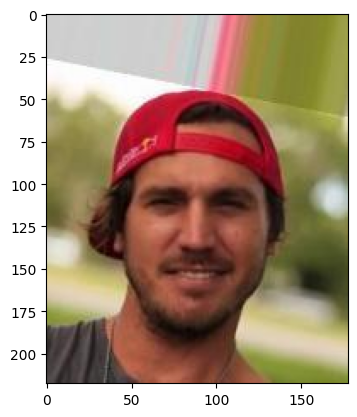

In [24]:
img_name = sample_df.iloc[0]['image_id']
img = Image.open(root_folder + img_name)
img_np = np.asarray(img)
plt.imshow(img)

<class 'numpy.ndarray'>


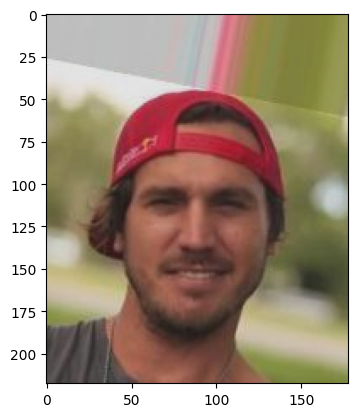

In [25]:
brightness_factor = 1.5
img_adjusted = F.adjust_brightness(img, 5)
img_adjusted = F.adjust_contrast(img, 0.8)
img_adjusted = np.asarray(img_adjusted)
print(type(img_adjusted))

# Display the brightness-adjusted image
plt.imshow(np.asarray(img_adjusted))


In [26]:
#brigthness_preds = []
#for i in tqdm(range(len(sample_df))):
#    img_name = sample_df.iloc[i]['image_id']
#    img = Image.open(root_folder + img_name)
#    img_adjusted = F.adjust_brightness(img, 1.5)
#    br_img = np.asarray(img_adjusted)
#    locs = face_recognition.face_locations(br_img)
#    if len(locs) == 0:
#        brigthness_preds.append(0)
#    else:
#        brigthness_preds.append(1)
    

In [27]:
new_sample_df = pd.read_csv('../data/preds_on_all_augmentations.csv')

In [34]:
new_sample_df['Recognized_brighter'].value_counts()

 1    40288
-1     5321
Name: Recognized_brighter, dtype: int64

<class 'PIL.Image.Image'>


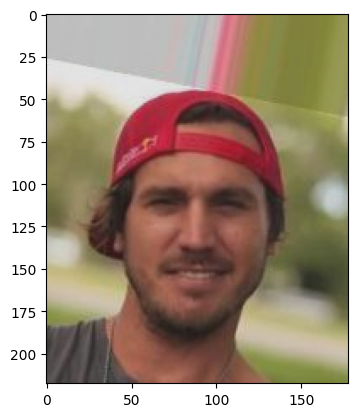

In [ ]:
img_name = sample_df.iloc[0]['image_id']
img = Image.open(root_folder + img_name)
brightness_factor = 1.5
img_adjusted = F.adjust_contrast(img, 0.8)
print(type(img_adjusted))

# Display the brightness-adjusted image
plt.imshow(np.asarray(img_adjusted))

In [30]:
#contrast_preds = []
#for i in tqdm(range(len(sample_df))):
#    img_name = sample_df.iloc[i]['image_id']
#    img = Image.open(root_folder + img_name)
#    img_adjusted = F.adjust_contrast(img, 1.2)
#    br_img = np.asarray(img_adjusted)
#    locs = face_recognition.face_locations(br_img)
#    if len(locs) == 0:
#        contrast_preds.append(-1)
#    else:
#        contrast_preds.append(1)

In [31]:
new_sample_df['Recognized_contrast'].value_counts()

 1    40218
-1     5391
Name: Recognized_contrast, dtype: int64

In [32]:
new_sample_df['Male'].value_counts()

-1    25763
 1    19846
Name: Male, dtype: int64

In [39]:
pred_combs = list(combinations(new_sample_df.columns[-5:],2))
pred_combs

[('Recognized', 'Recognized_lighter_skin'),
 ('Recognized', 'Recognized_darker_skin'),
 ('Recognized', 'Recognized_brighter'),
 ('Recognized', 'Recognized_contrast'),
 ('Recognized_lighter_skin', 'Recognized_darker_skin'),
 ('Recognized_lighter_skin', 'Recognized_brighter'),
 ('Recognized_lighter_skin', 'Recognized_contrast'),
 ('Recognized_darker_skin', 'Recognized_brighter'),
 ('Recognized_darker_skin', 'Recognized_contrast'),
 ('Recognized_brighter', 'Recognized_contrast')]

5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
error
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young
Recognized
error
Recognized_lighter_skin
error
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


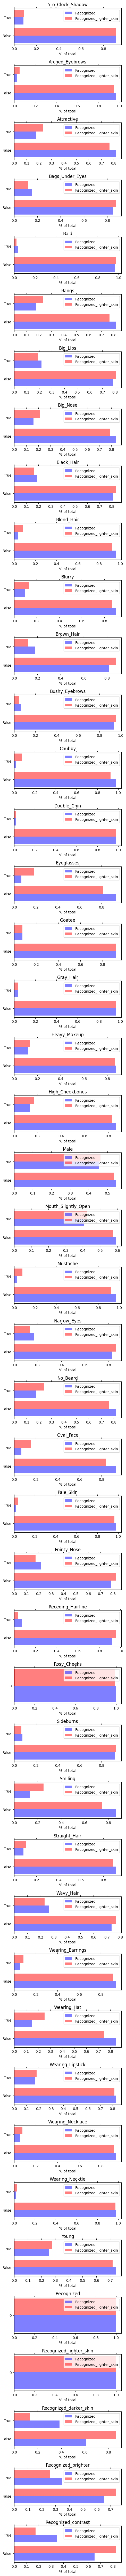

In [46]:
col1,col2 = pred_combs[0]
col1,col2 = str(col1), str(col2)
df1 = new_sample_df.query(f'{col1} == -1 and {col2} == 1').set_index('image_id')
df2 = new_sample_df.query(f'{col1} == 1 and {col2} == -1').set_index('image_id')

bar_width = 0.4
bar_offset = bar_width/2

fig, axs = plt.subplots(nrows=len(df1.columns), figsize=(5, 100))

for i, col in enumerate(df1.columns):
    # Calculate the position for the bars
    print(col)
    positions = np.arange(len(df1[col].value_counts()))

    # Plot the found count bars
    axs[i].barh(positions - bar_offset, df1[col].value_counts()/len(df1), height=bar_width, color='blue',
                alpha=0.5, label=col1)

    # Plot the not found count bars
    axs[i].barh(positions + bar_offset,df2[col].value_counts()/len(df2), height=bar_width, color='red',
                alpha=0.5, label=col2)

    axs[i].set_yticks(positions)
    # axs[i].set_yticklabels(df1[col].value_counts().index)
    try:
        axs[i].set_yticklabels(['False', 'True'])
    except:
        print('error')
    axs[i].tick_params(top=True)
    
    axs[i].set_xlabel('% of total')
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()

In [47]:
for c1,c2 in pred_combs:
    print(c1,c2)
    col1,col2 = str(c1), str(c2)
    print('Both recognized')
    print(new_sample_df.query(f'{col1} ==  1 and {col2} == 1').shape[0])
    print(c2, 'recognized')
    print(new_sample_df.query(f'{col1} == -1 and {col2} == 1').shape[0])
    print(c1, 'recognized')
    print(new_sample_df.query(f'{col1} == 1 and {col2} == -1').shape[0])
    print('Both not recognized')
    print(new_sample_df.query(f'{col1} == -1 and {col2} == -1').shape[0])

Recognized Recognized_lighter_skin
Both recognized
39700
Recognized_lighter_skin recognized
106
Recognized recognized
300
Both not recognized
5503
Recognized Recognized_darker_skin
Both recognized
39501
Recognized_darker_skin recognized
78
Recognized recognized
499
Both not recognized
5531
Recognized Recognized_brighter
Both recognized
39759
Recognized_brighter recognized
529
Recognized recognized
241
Both not recognized
5080
Recognized Recognized_contrast
Both recognized
39932
Recognized_contrast recognized
286
Recognized recognized
68
Both not recognized
5323
Recognized_lighter_skin Recognized_darker_skin
Both recognized
39502
Recognized_darker_skin recognized
77
Recognized_lighter_skin recognized
304
Both not recognized
5726
Recognized_lighter_skin Recognized_brighter
Both recognized
39574
Recognized_brighter recognized
714
Recognized_lighter_skin recognized
232
Both not recognized
5089
Recognized_lighter_skin Recognized_contrast
Both recognized
39721
Recognized_contrast recognized


In [49]:
differnce_tab_dict = {}
for c in new_sample_df.columns[-5:]:
    differnce_tab_dict[c] = []
    for c2 in new_sample_df.columns[-5:]:
        col1,col2 = str(c), str(c2)
        df2 = new_sample_df.query(f'{col1} == 1 and {col2} == -1').set_index('image_id')
        differnce_tab_dict[c].append(df2.shape[0])
differnce_tab_dict

{'Recognized': [0, 300, 499, 241, 68],
 'Recognized_lighter_skin': [106, 0, 304, 232, 85],
 'Recognized_darker_skin': [78, 77, 0, 190, 63],
 'Recognized_brighter': [529, 714, 899, 0, 424],
 'Recognized_contrast': [286, 497, 702, 354, 0]}

In [52]:
t_index = ['original','lighter filter','darker filter','brighter','more contrast']

cross_df = pd.DataFrame(differnce_tab_dict, index=t_index)
cross_df.columns = t_index
cross_df

original  lighter filter  darker filter  brighter  \
original               0             106             78       529   
lighter filter       300               0             77       714   
darker filter        499             304              0       899   
brighter             241             232            190         0   
more contrast         68              85             63       424   

                more contrast  
original                  286  
lighter filter            497  
darker filter             702  
brighter                  354  
more contrast               0

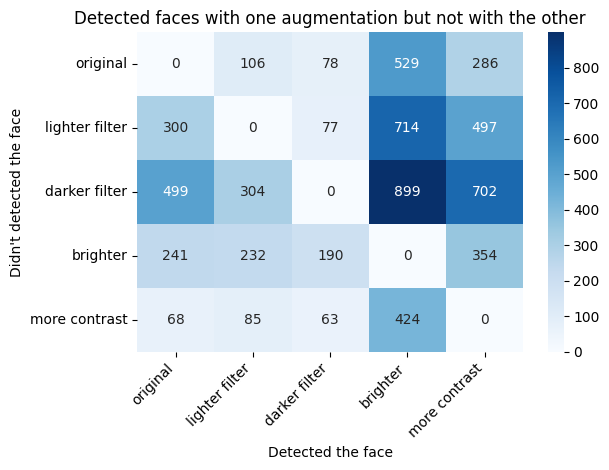

In [68]:
cross_heat_map = sns.heatmap(cross_df, annot=True, cmap='Blues', fmt='g')
cross_heat_map.set_title('Detected faces with one augmentation but not with the other')
cross_heat_map.set_xlabel('Detected the face')
cross_heat_map.set_ylabel("Didn't detected the face")
cross_heat_map.set_xticklabels(cross_heat_map.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.savefig('detected_faces_with_one.png')

In [64]:
plt.savefig('detected_faces_with_one.png')

<Figure size 640x480 with 0 Axes>

In [69]:
new_sample_df['Recognized_brighter'].value_counts()

 1    40288
-1     5321
Name: Recognized_brighter, dtype: int64

In [80]:
binary_features = list(new_sample_df.columns[:-5])
augs = list(new_sample_df.columns[-5:])

In [74]:
#new_sample_df.set_index('image_id', inplace=True)
aug = 'Recognized_brighter'
filtered_new_df = new_sample_df.query(f'{aug} == 1')
filtered_new_df['Arched_Eyebrows'].value_counts() / len(filtered_new_df)

-1    0.728877
 1    0.271123
Name: Arched_Eyebrows, dtype: float64

5_o_Clock_Shadow
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Arched_Eyebrows
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


/tmp/ipykernel_7530/1787010812.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/1787010812.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')


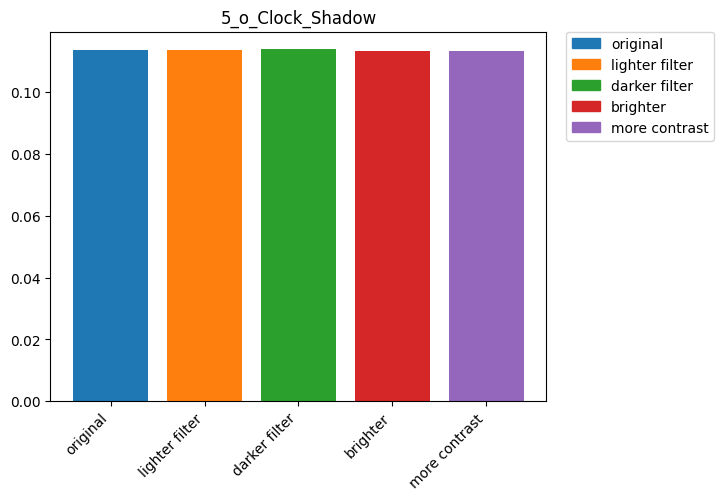

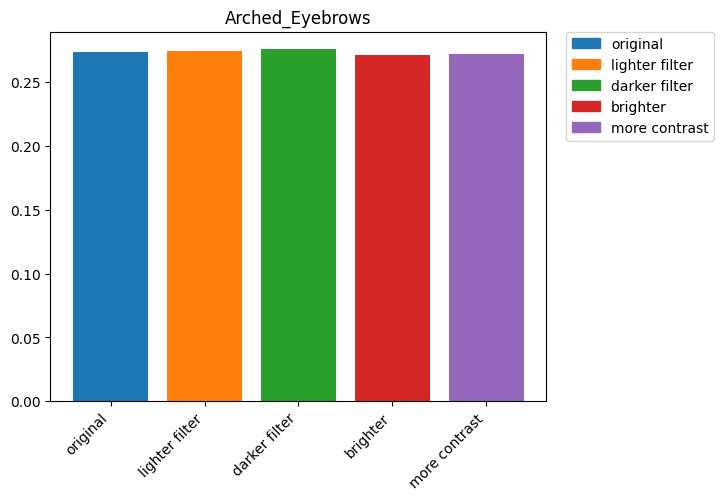

In [106]:
for feature in binary_features:
    if feature == binary_features[2]:
        break
    print(feature)
    found_ratios = []
    not_found_ratios = []
    for aug in augs:
        print(aug)
        filtered_new_df = new_sample_df.query(f'{aug} == 1')
        feature_ratio = filtered_new_df[feature].value_counts() / len(filtered_new_df)
        found_ratios.append(feature_ratio[1])
        filtered_new_df = new_sample_df.query(f'{aug} == -1')
        feature_ratio = filtered_new_df[feature].value_counts() / len(filtered_new_df)
        not_found_ratios.append(feature_ratio[1])
    fig, ax = plt.subplots()
    ax.bar(t_index, found_ratios,color = mcolors.TABLEAU_COLORS)
    ax.set_title(feature)   
    ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
    color_names = list(mcolors.TABLEAU_COLORS.keys())[:5]
    patches = [mpatches.Patch(color = color_names[i], label = l)for i,l in enumerate(t_index)]
    ax.legend(handles = patches,bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

    

In [97]:
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [108]:
new_sample_df.columns[-5:]

Index(['Recognized', 'Recognized_lighter_skin', 'Recognized_darker_skin',
       'Recognized_brighter', 'Recognized_contrast'],
      dtype='object')

In [124]:

all_rec_df = new_sample_df.query('Recognized == 1 and Recognized_lighter_skin == 1 \
                    and Recognized_darker_skin == 1 \
                    and Recognized_brighter == 1 \
                    and Recognized_contrast == 1')

In [120]:
non_rec_df = new_sample_df.query('Recognized == -1 \
                    and Recognized_lighter_skin == -1 \
                    and Recognized_darker_skin == -1 \
                    and Recognized_brighter == -1 \
                    and Recognized_contrast == -1')

In [121]:
len(new_sample_df) -39327 -4869

1413

In [126]:
some_rec_df = new_sample_df.copy()
some_rec_df = some_rec_df[~some_rec_df.isin(non_rec_df)].dropna(how='all')
some_rec_df = some_rec_df[~some_rec_df.isin(all_rec_df)].dropna(how='all')

In [127]:
some_rec_df

5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
image_id                                                                     
087832.jpg              -1.0             -1.0         1.0             -1.0   
122343.jpg              -1.0             -1.0         1.0              1.0   
135617.jpg              -1.0             -1.0        -1.0             -1.0   
125205.jpg              -1.0             -1.0        -1.0             -1.0   
116952.jpg              -1.0             -1.0        -1.0             -1.0   
...                      ...              ...         ...              ...   
201168.jpg              -1.0             -1.0        -1.0              1.0   
201791.jpg              -1.0             -1.0        -1.0             -1.0   
201900.jpg              -1.0             -1.0        -1.0             -1.0   
202155.jpg              -1.0             -1.0        -1.0             -1.0   
202476.jpg              -1.0             -1.0         1.0             -1.0   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
image_id                                                             ...   
087832.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
122343.jpg  -1.0    1.0      -1.0       1.0         1.0        -1.0  ...   
135617.jpg  -1.0   -1.0       1.0      -1.0        -1.0        -1.0  ...   
125205.jpg  -1.0   -1.0      -1.0       1.0        -1.0        -1.0  ...   
116952.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
...          ...    ...       ...       ...         ...         ...  ...   
201168.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
201791.jpg  -1.0    1.0      -1.0      -1.0         1.0        -1.0  ...   
201900.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
202155.jpg  -1.0    1.0      -1.0      -1.0         1.0        -1.0  ...   
202476.jpg  -1.0    1.0       1.0      -1.0        -1.0        -1.0  ...   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
image_id                                                                       
087832.jpg         -1.0              -1.0               1.0             -1.0   
122343.jpg         -1.0              -1.0              -1.0             -1.0   
135617.jpg         -1.0               1.0              -1.0             -1.0   
125205.jpg         -1.0              -1.0              -1.0             -1.0   
116952.jpg          1.0              -1.0              -1.0             -1.0   
...                 ...               ...               ...              ...   
201168.jpg          1.0              -1.0              -1.0             -1.0   
201791.jpg         -1.0               1.0              -1.0             -1.0   
201900.jpg         -1.0              -1.0              -1.0             -1.0   
202155.jpg         -1.0               1.0              -1.0             -1.0   
202476.jpg         -1.0               1.0               1.0             -1.0   

            Young  Recognized  Recognized_lighter_skin  \
image_id                                                 
087832.jpg    1.0         1.0                      1.0   
122343.jpg    1.0         1.0                      1.0   
135617.jpg   -1.0         1.0                      1.0   
125205.jpg   -1.0         1.0                      1.0   
116952.jpg    1.0         1.0                     -1.0   
...           ...         ...                      ...   
201168.jpg   -1.0        -1.0                     -1.0   
201791.jpg    1.0        -1.0                     -1.0   
201900.jpg    1.0        -1.0                     -1.0   
202155.jpg    1.0        -1.0                     -1.0   
202476.jpg    1.0        -1.0                     -1.0   

            Recognized_darker_skin  Recognized_brighter  Recognized_contrast  
image_id                                                                      
087832.jpg                    -1.0                  1.

5_o_Clock_Shadow
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Arched_Eyebrows
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Attractive
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Bags_Under_Eyes
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')


Bald
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Bangs
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Big_Lips
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Big_Nose
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Black_Hair
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Blond_Hair
Recognized


/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')


Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Blurry
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Brown_Hair
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Bushy_Eyebrows
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Chubby
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')


Double_Chin
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Eyeglasses
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Goatee
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Gray_Hair
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Heavy_Makeup
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
High_Cheekbones
Recognized


/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')


Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Male
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Mouth_Slightly_Open
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Mustache
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Narrow_Eyes
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


/tmp/ipykernel_7530/3826263259.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter s

No_Beard
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Oval_Face
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Pale_Skin
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Pointy_Nose
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast
Receding_Hairline
Recognized
Recognized_lighter_skin
Recognized_darker_skin
Recognized_brighter
Recognized_contrast


/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3826263259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')


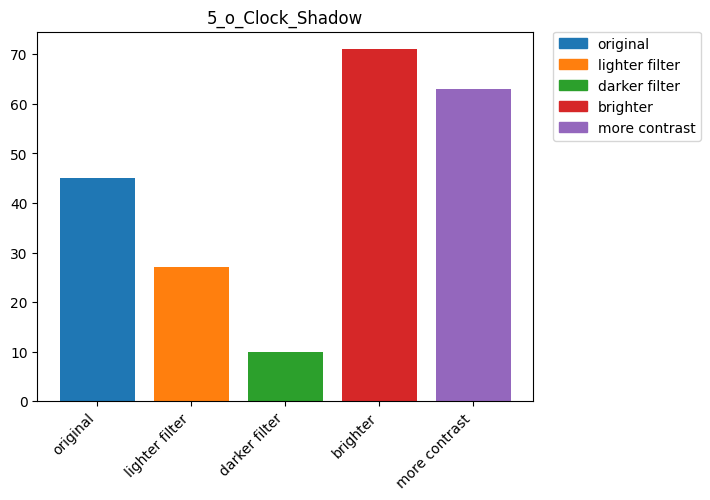

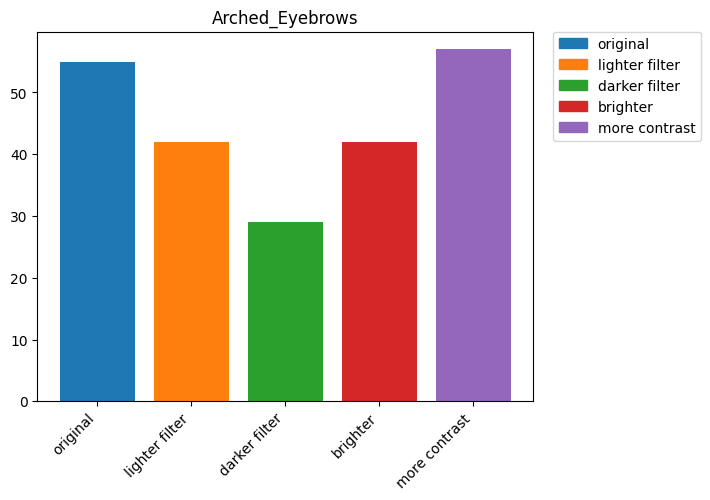

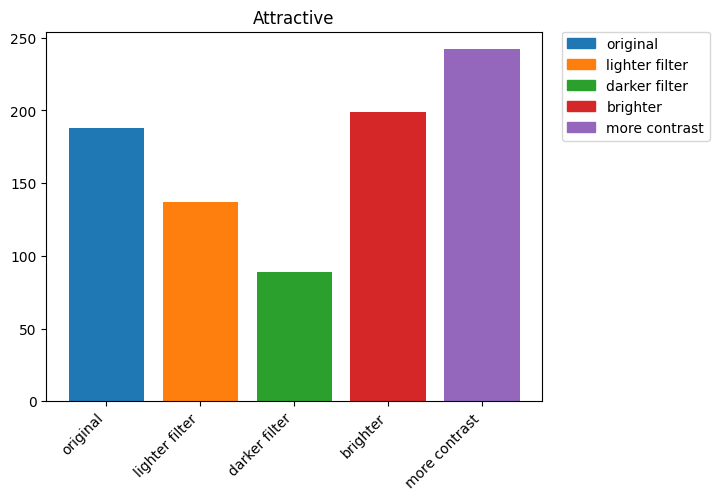

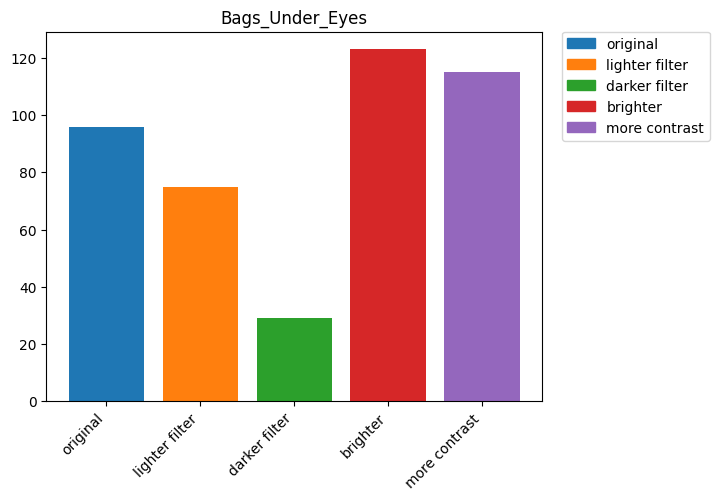

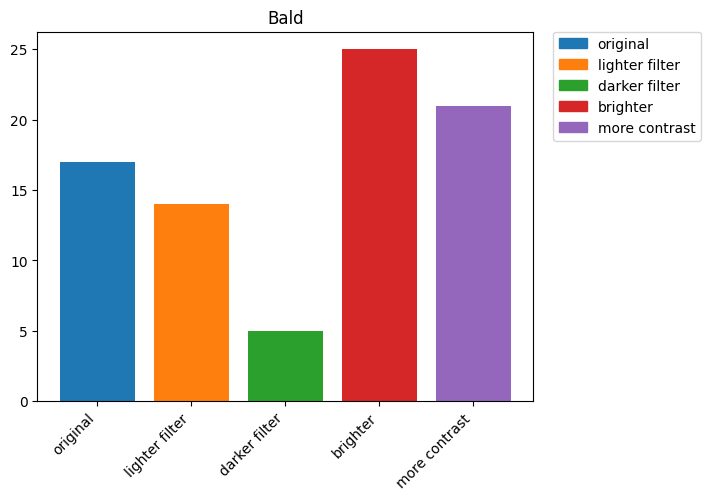

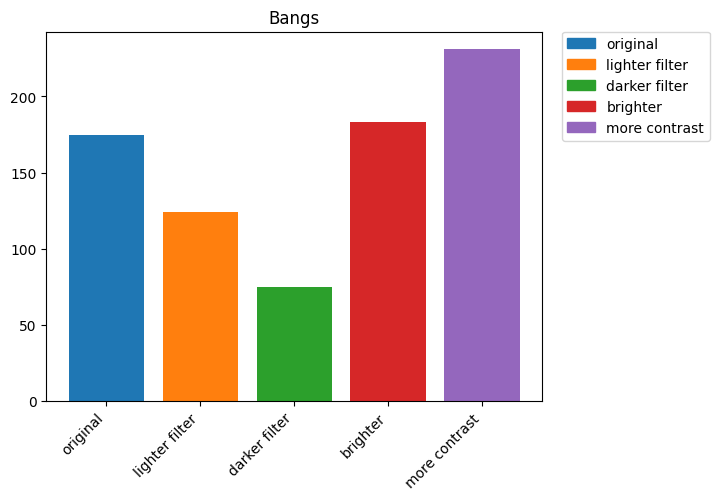

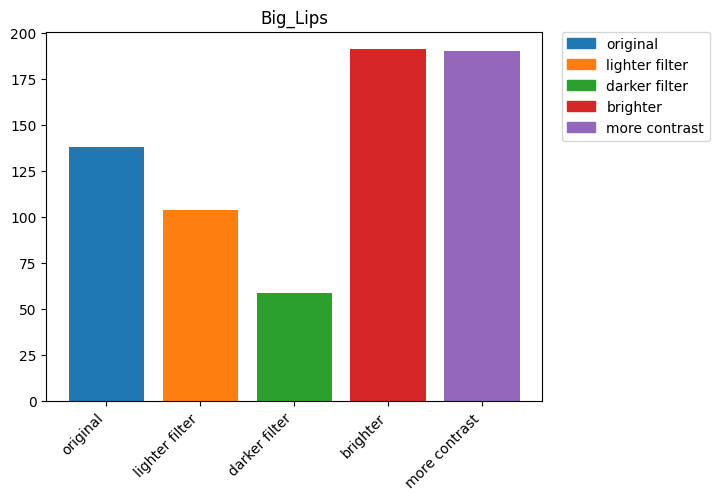

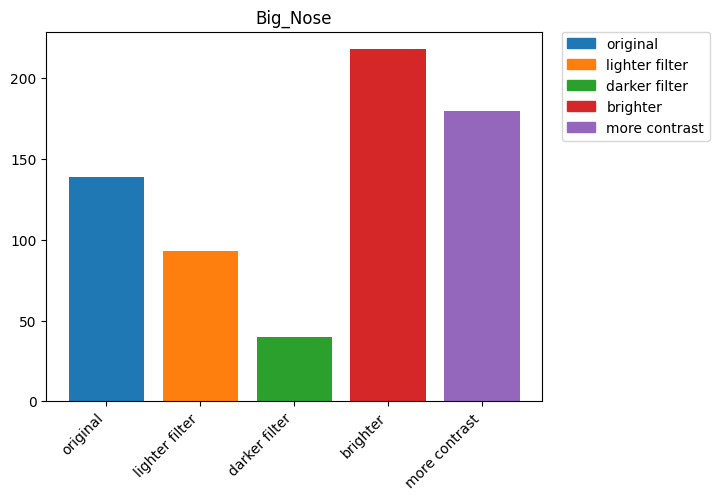

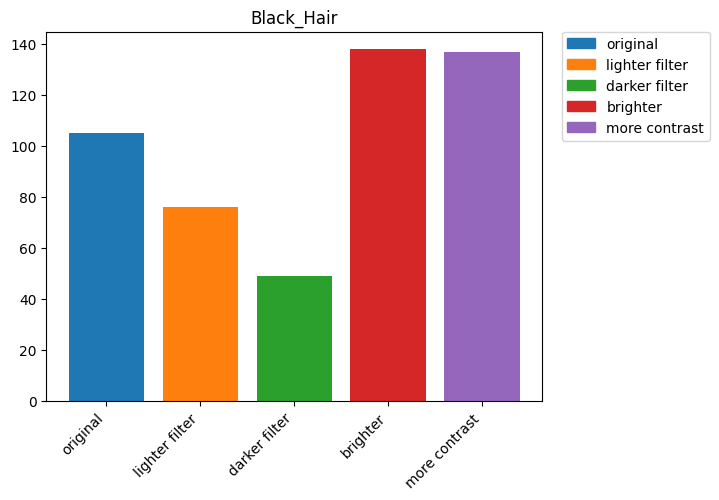

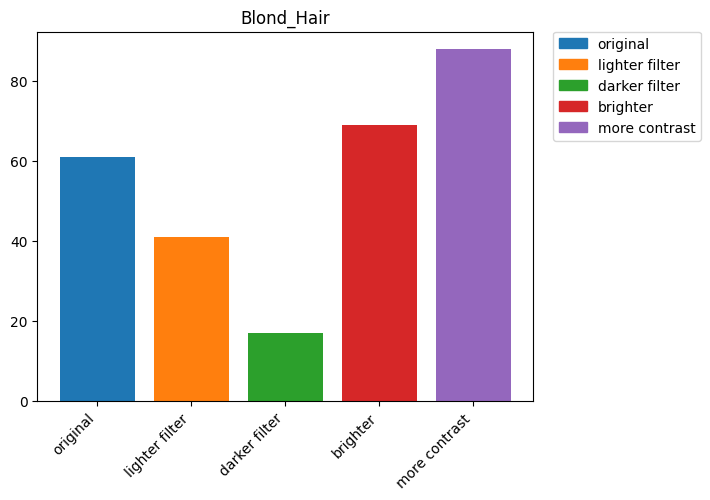

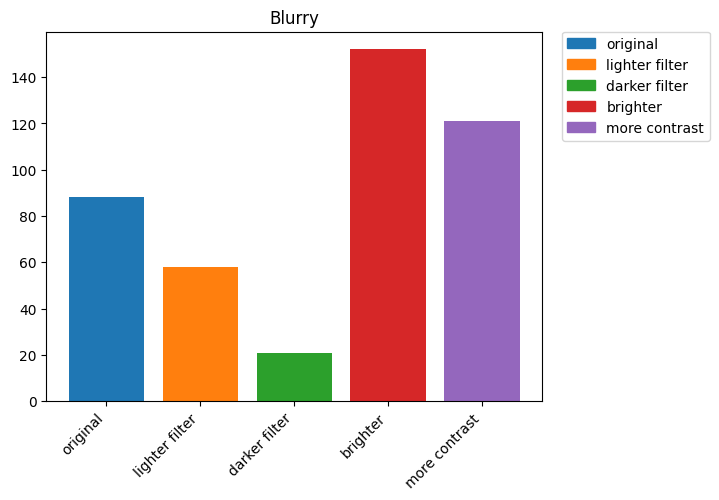

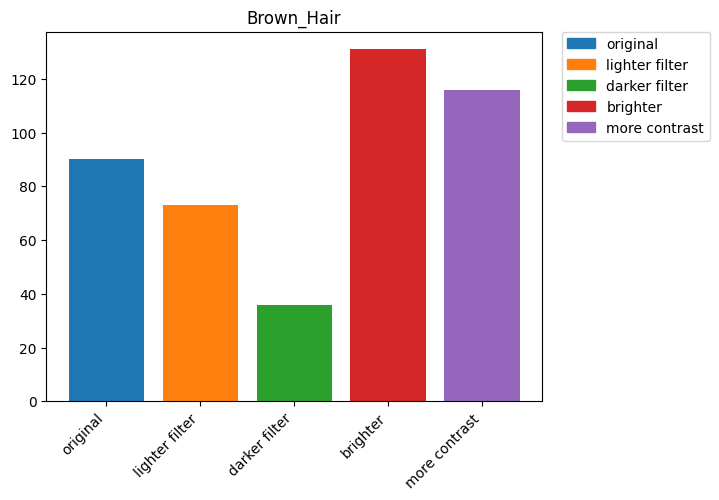

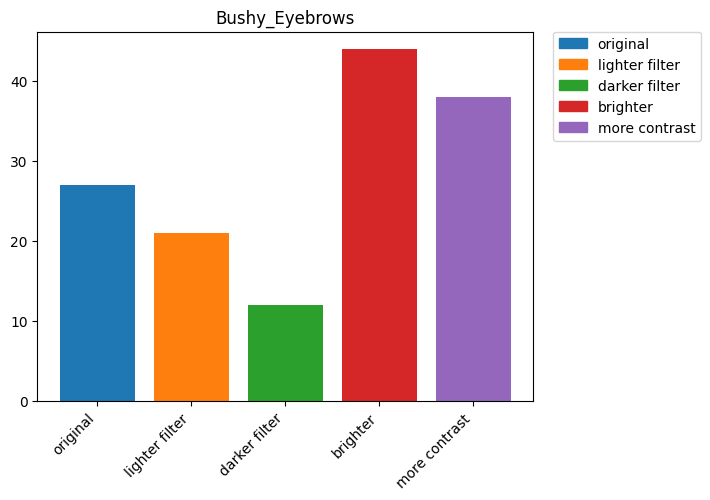

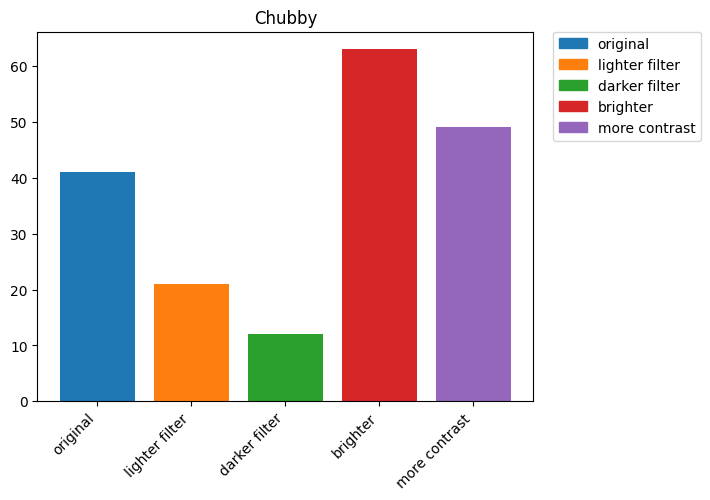

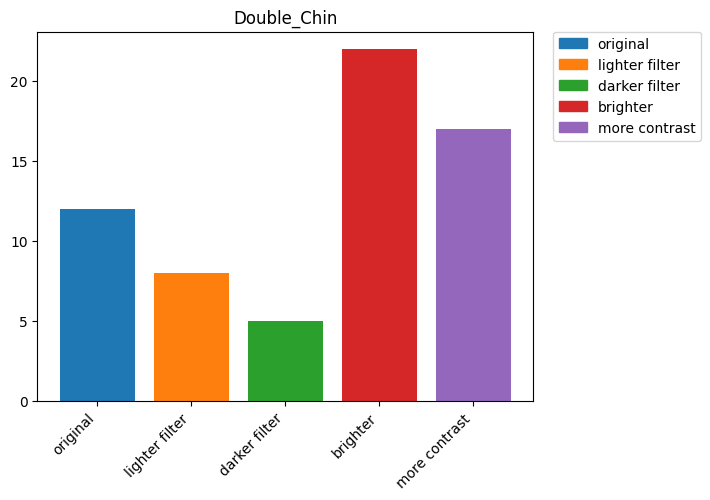

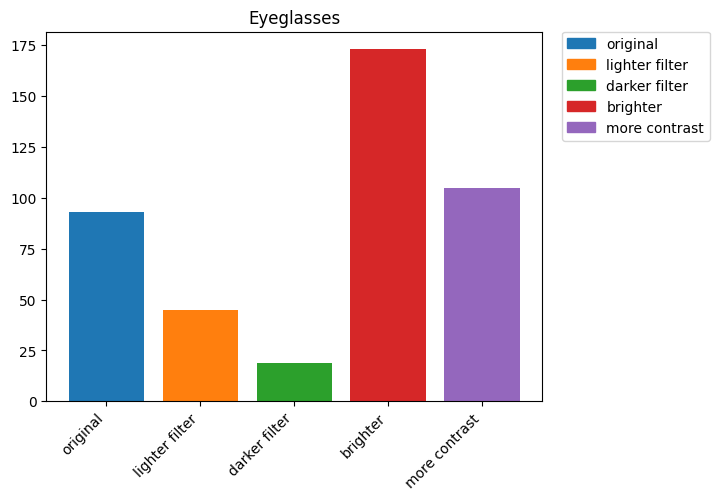

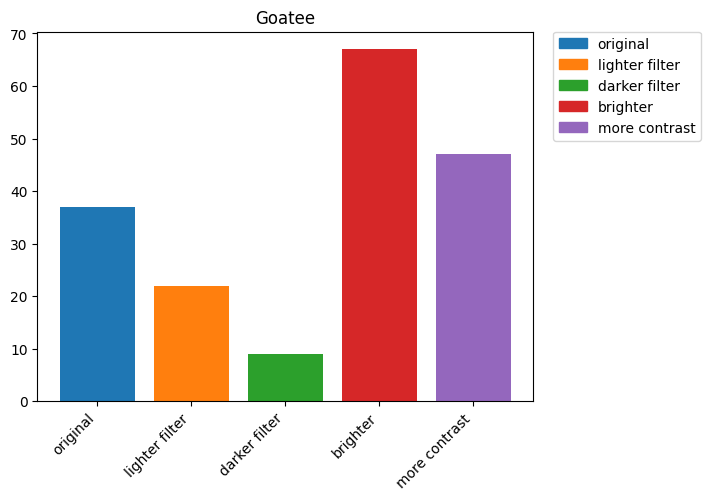

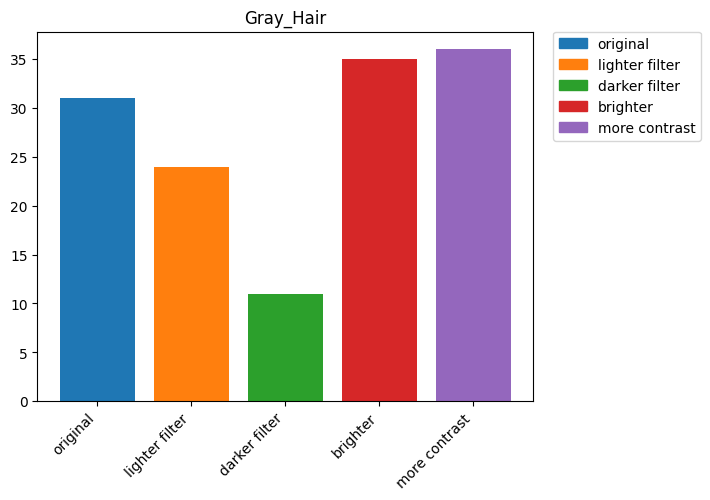

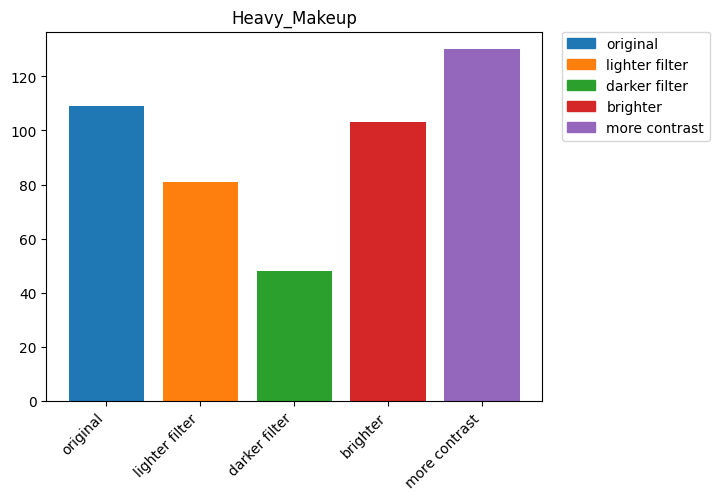

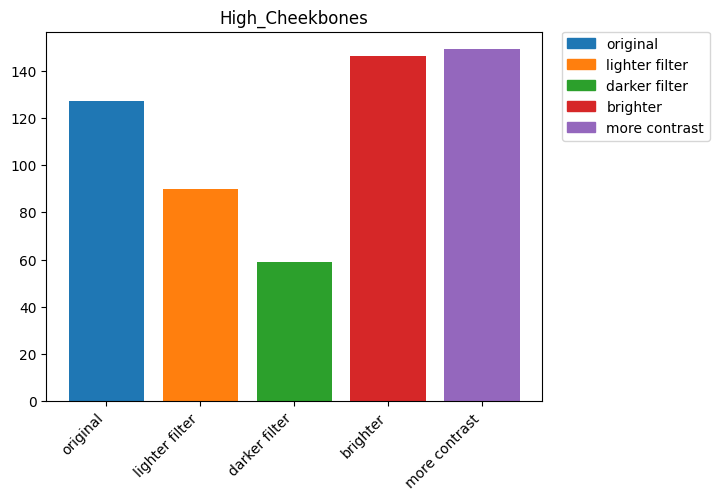

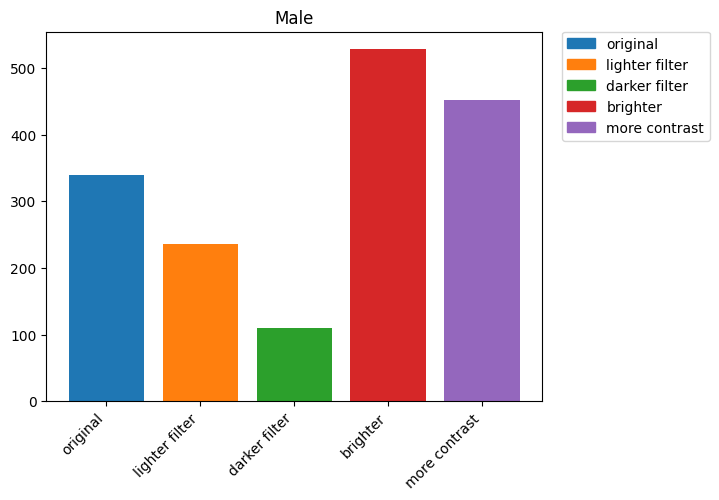

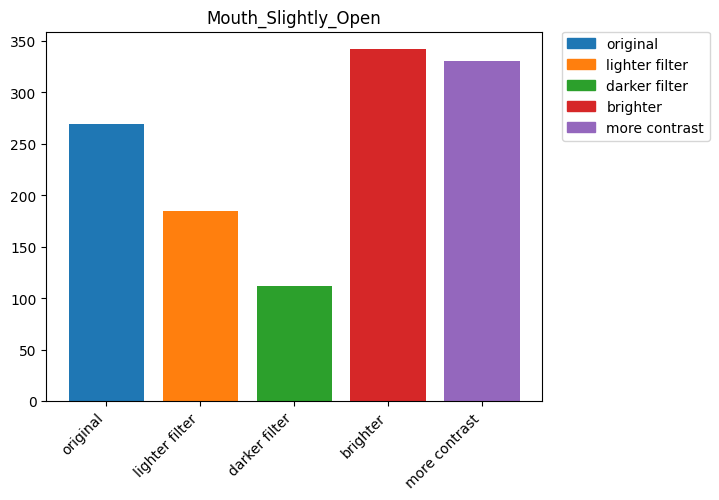

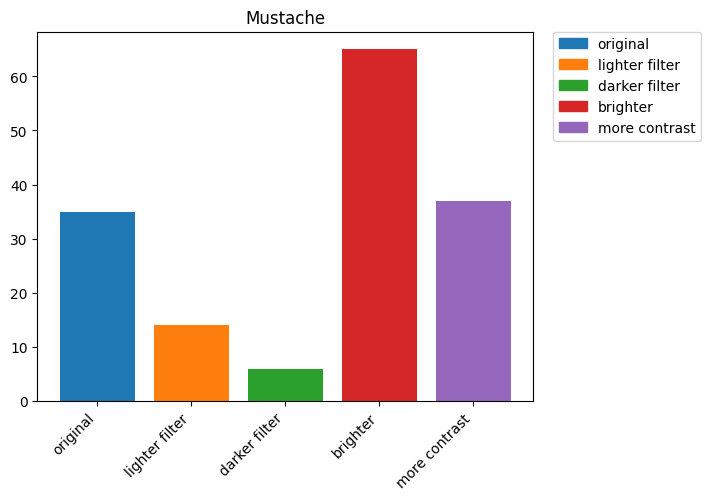

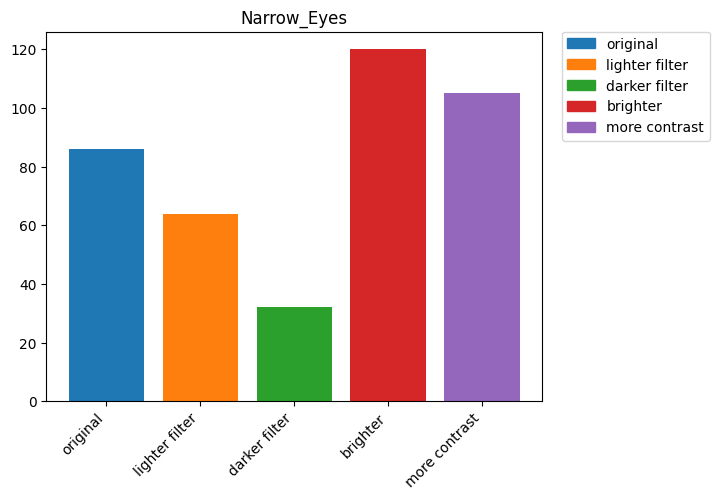

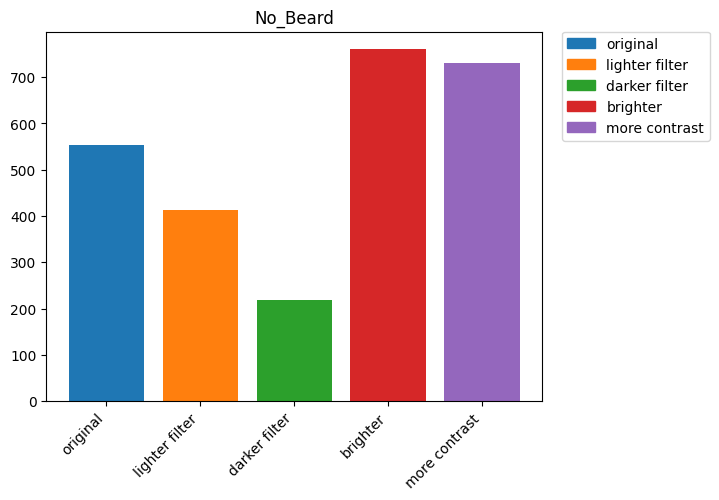

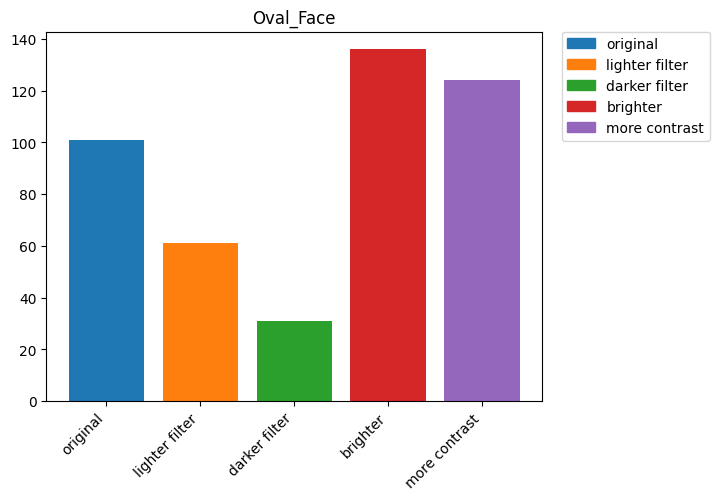

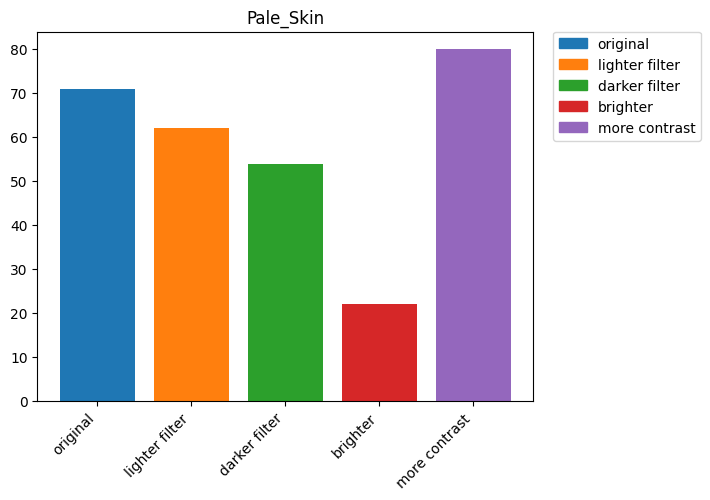

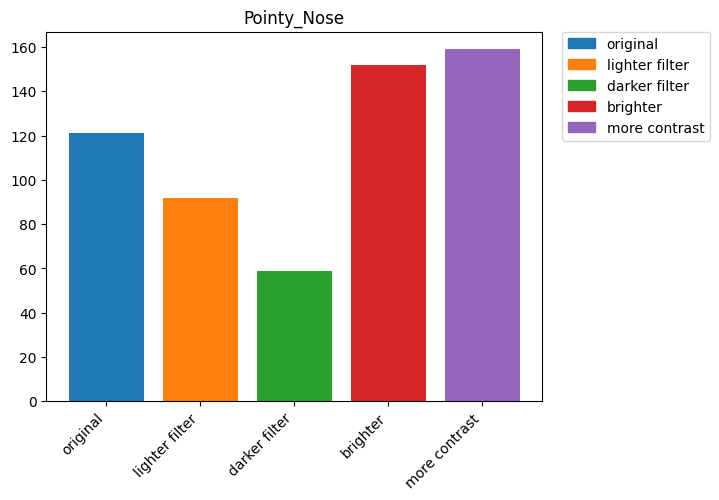

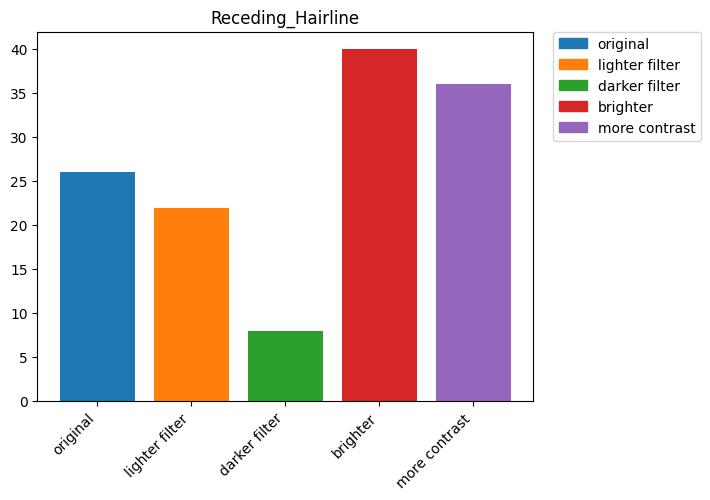

In [131]:
for feature in binary_features:
    if feature == 'Rosy_Cheeks':
        break
    print(feature)
    found_ratios = []
    not_found_ratios = []
    for aug in augs:
        print(aug)
        filtered_new_df = some_rec_df.query(f'{aug} == 1')
        feature_ratio = filtered_new_df[feature].value_counts() 
        found_ratios.append(feature_ratio[1])
        filtered_new_df = some_rec_df.query(f'{aug} == -1')
        feature_ratio = filtered_new_df[feature].value_counts() 
        not_found_ratios.append(feature_ratio[1])
    fig, ax = plt.subplots()
    ax.bar(t_index, found_ratios,color = mcolors.TABLEAU_COLORS)
    ax.set_title(feature)   
    ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
    color_names = list(mcolors.TABLEAU_COLORS.keys())[:5]
    patches = [mpatches.Patch(color = color_names[i], label = l)for i,l in enumerate(t_index)]
    ax.legend(handles = patches,bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

/tmp/ipykernel_7530/3905361976.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3905361976.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3905361976.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3905361976.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3905361976.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
/tmp/ipykernel_7530/3905361976.py:27: UserWarning: FixedFormatter should on

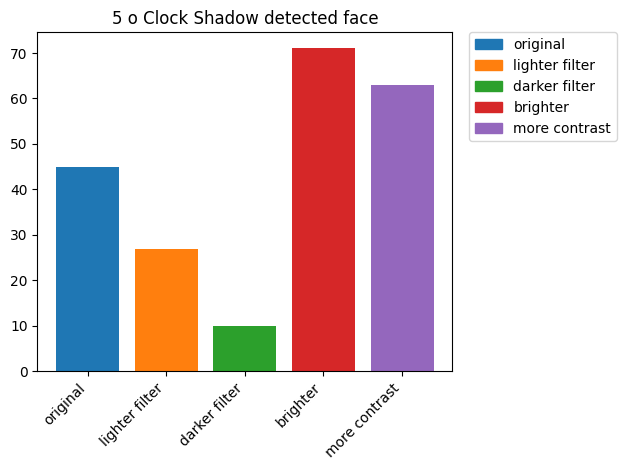

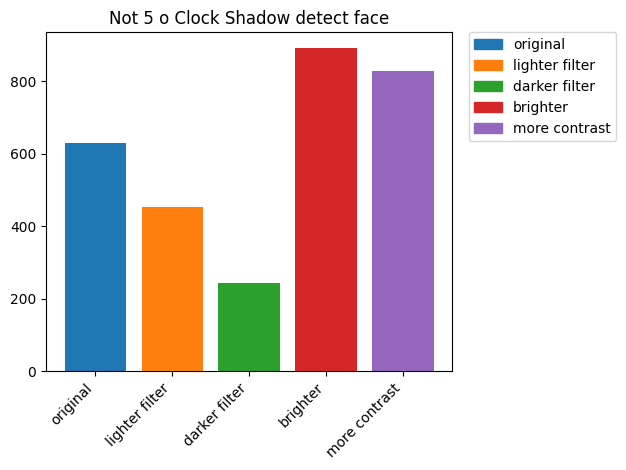

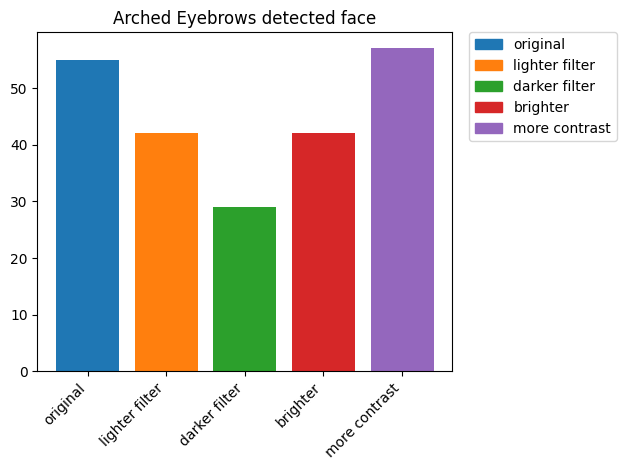

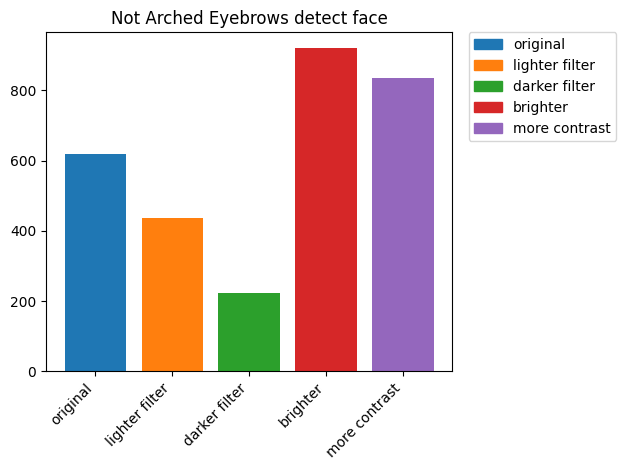

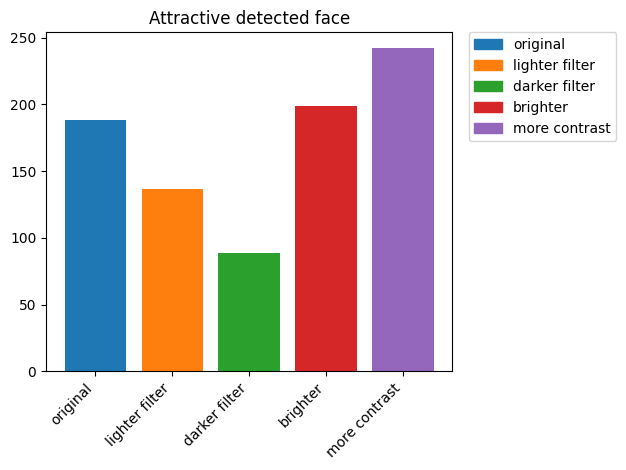

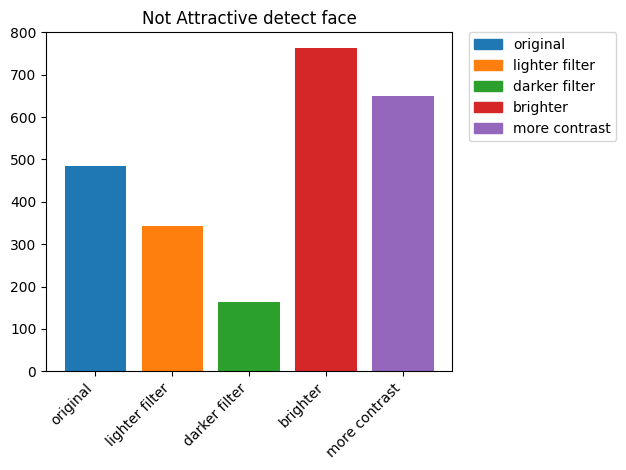

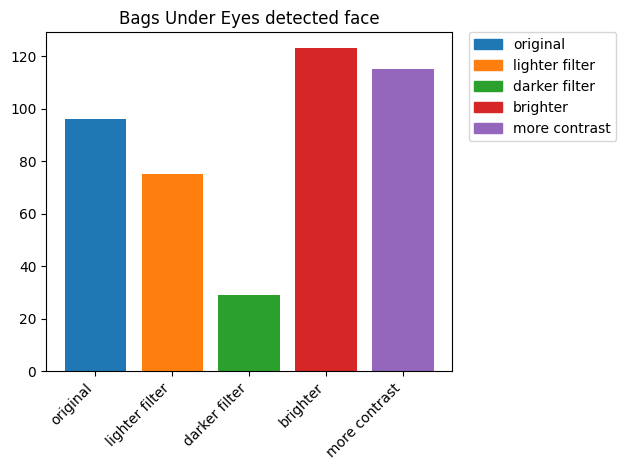

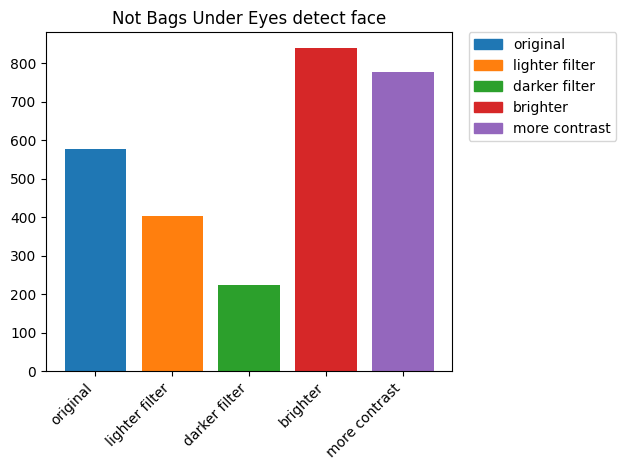

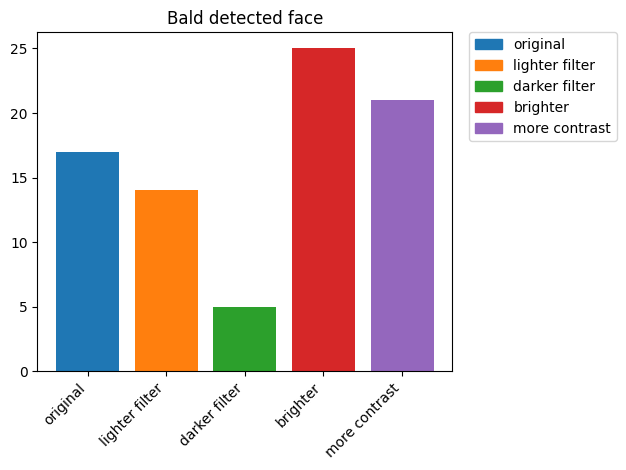

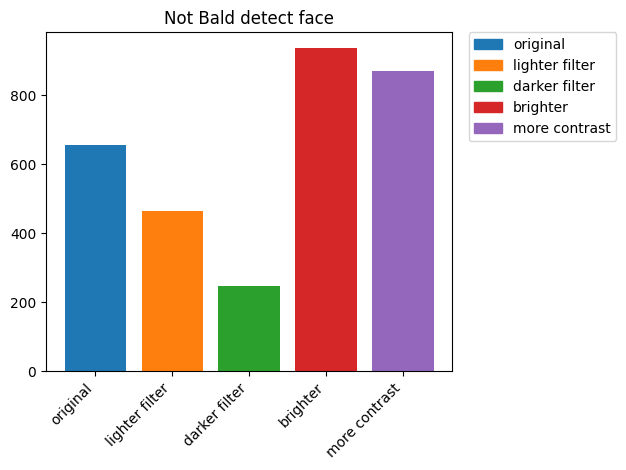

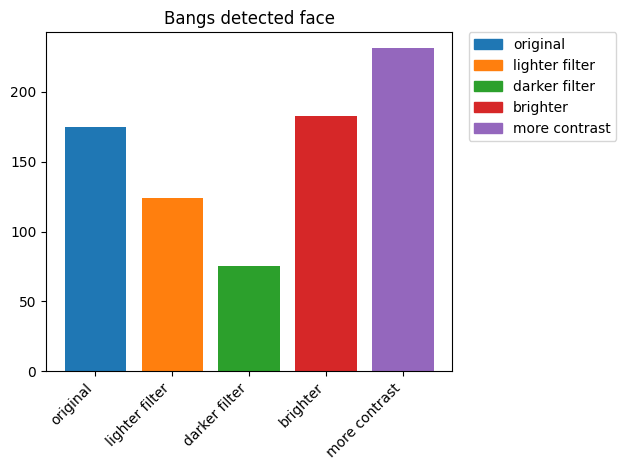

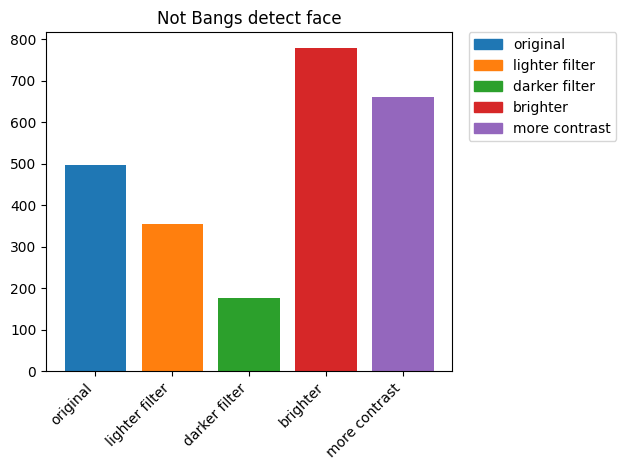

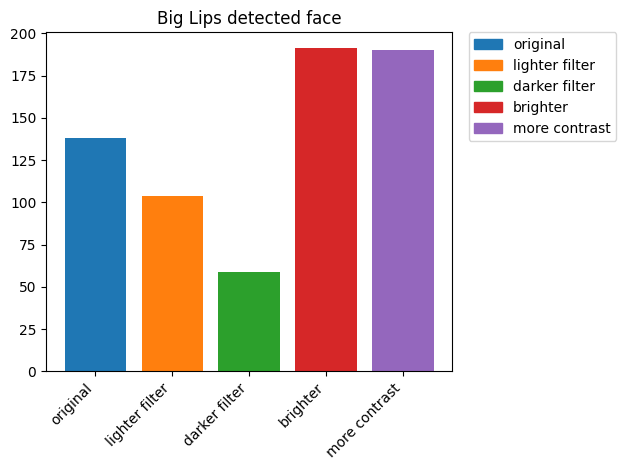

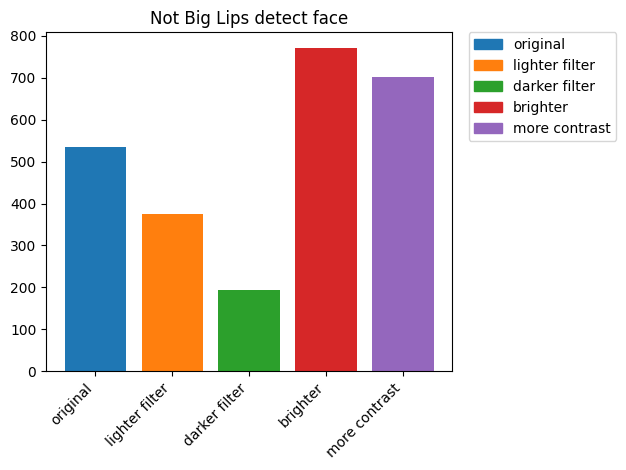

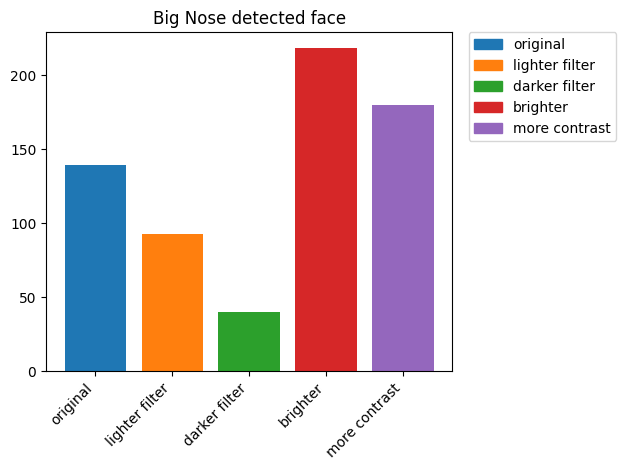

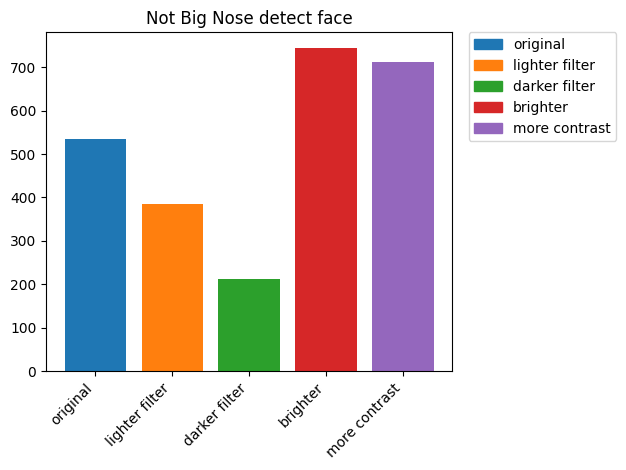

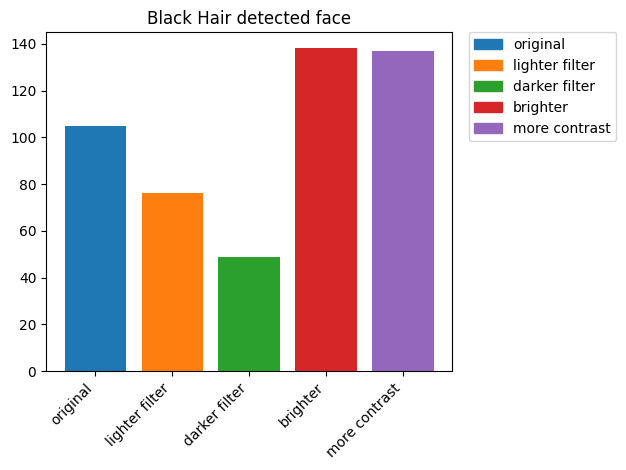

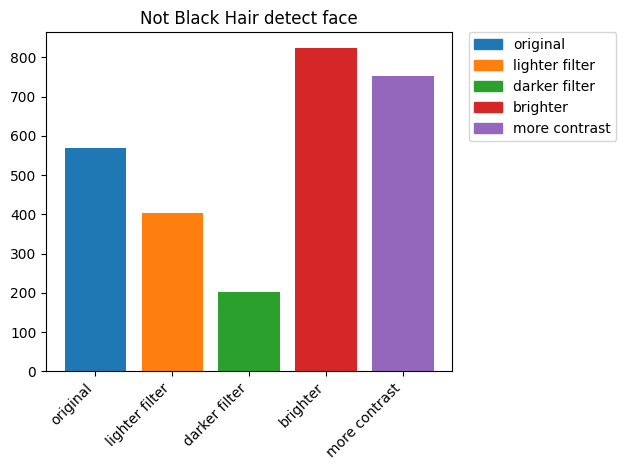

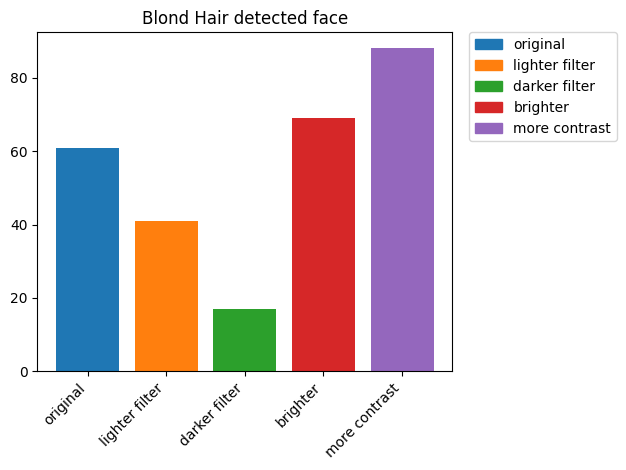

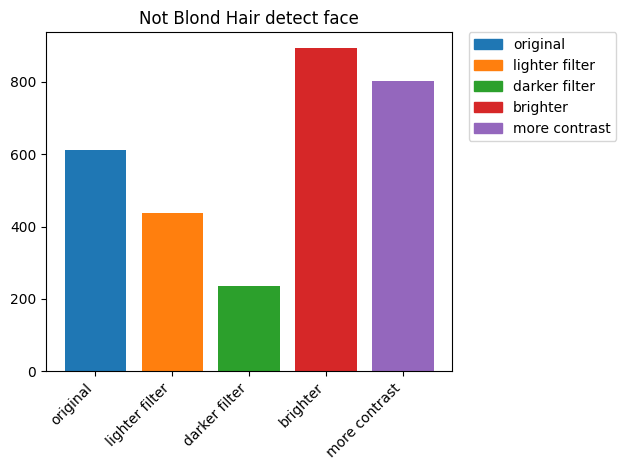

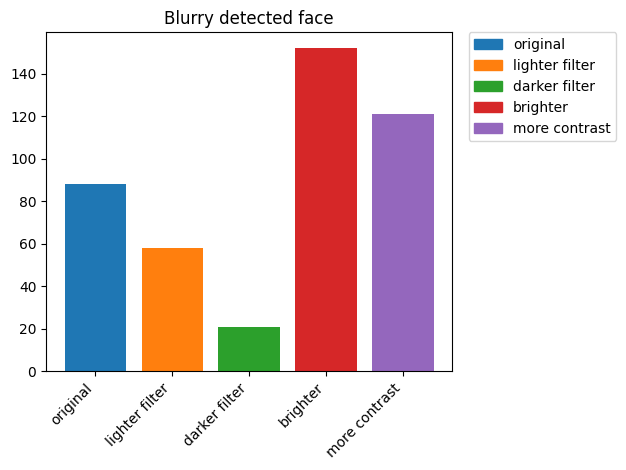

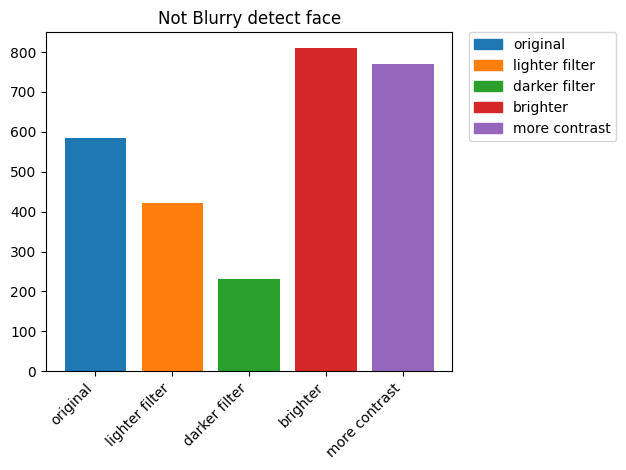

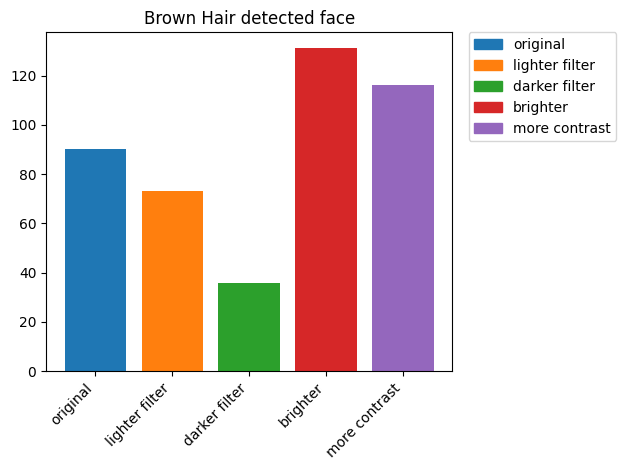

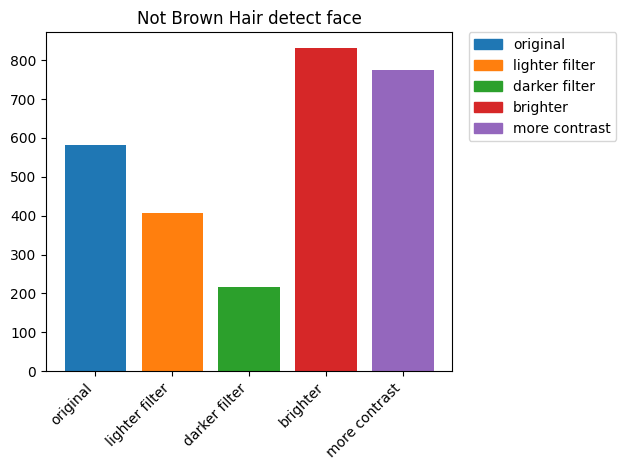

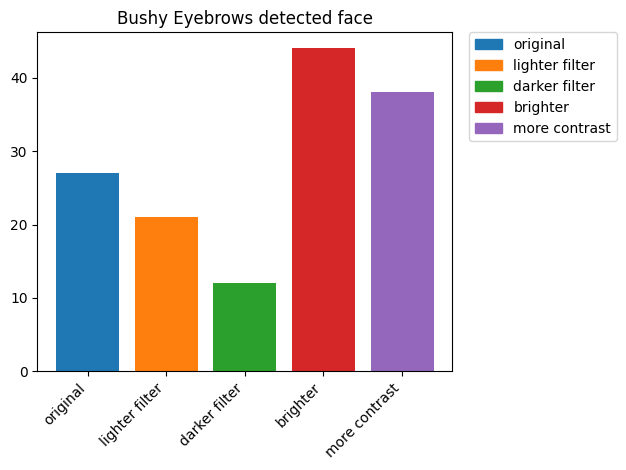

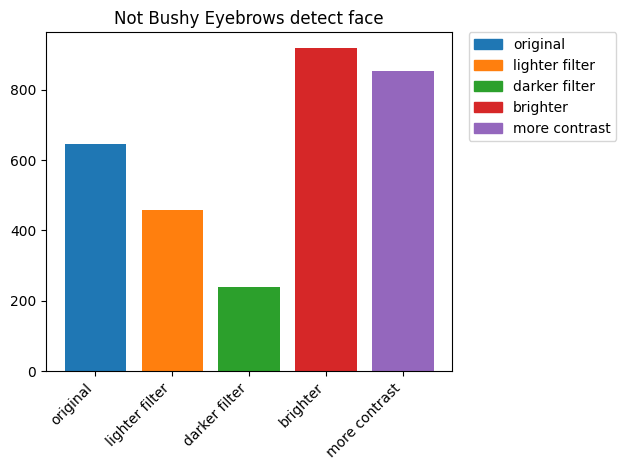

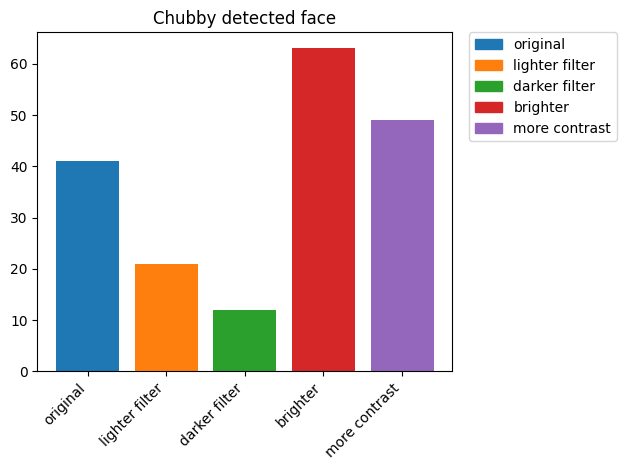

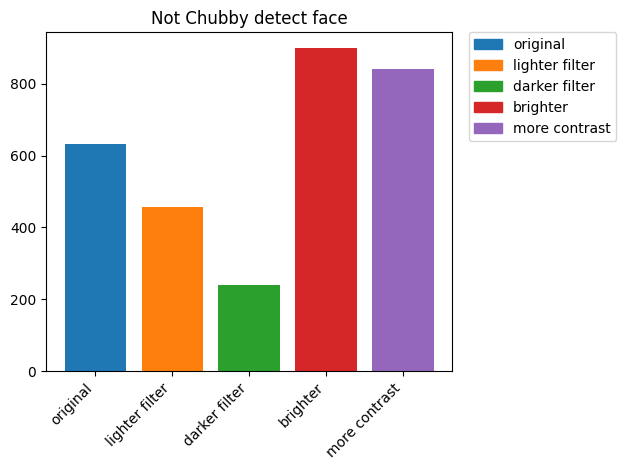

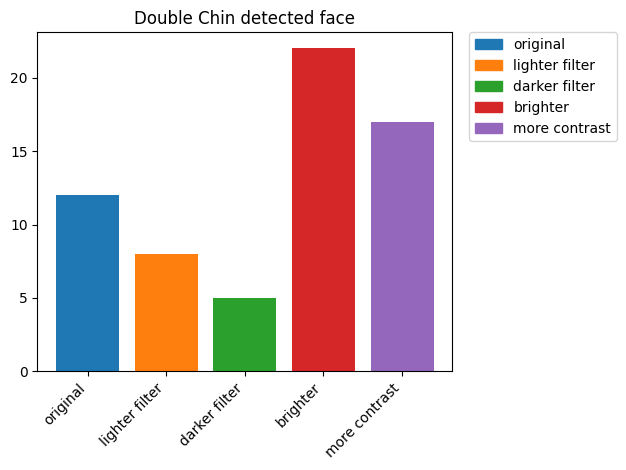

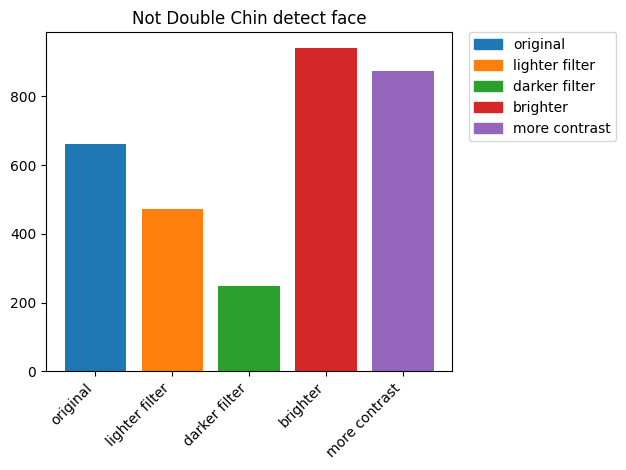

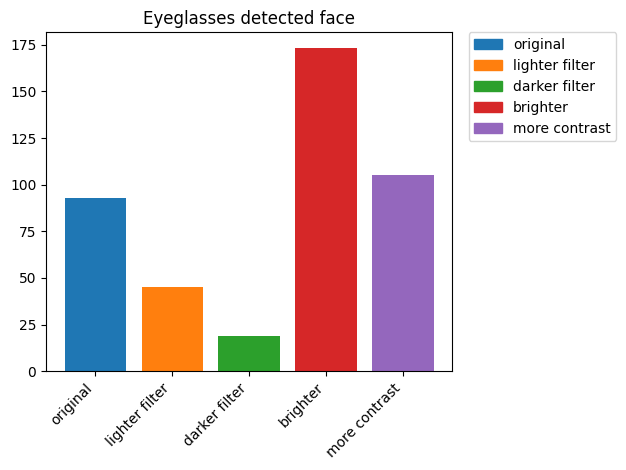

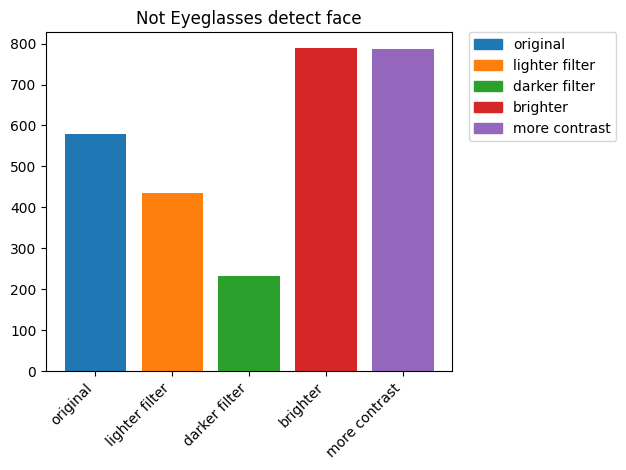

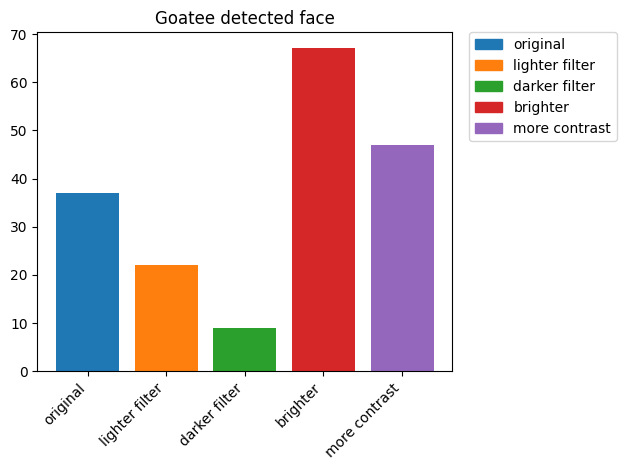

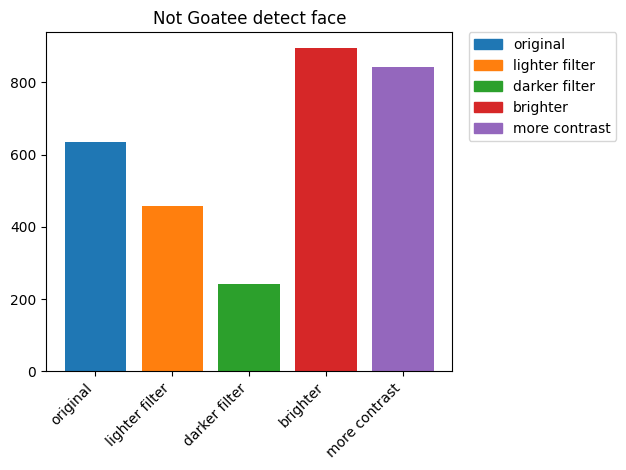

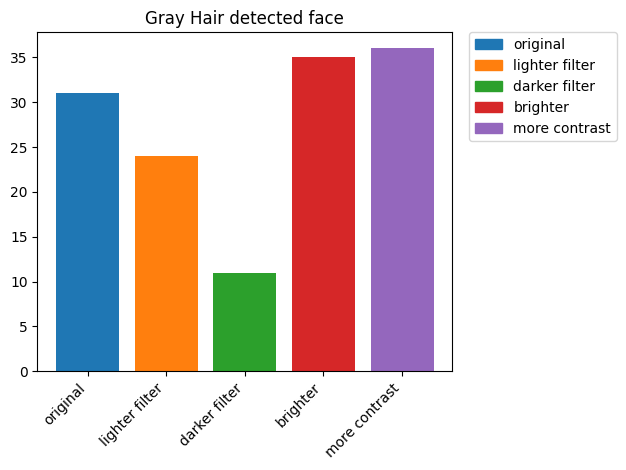

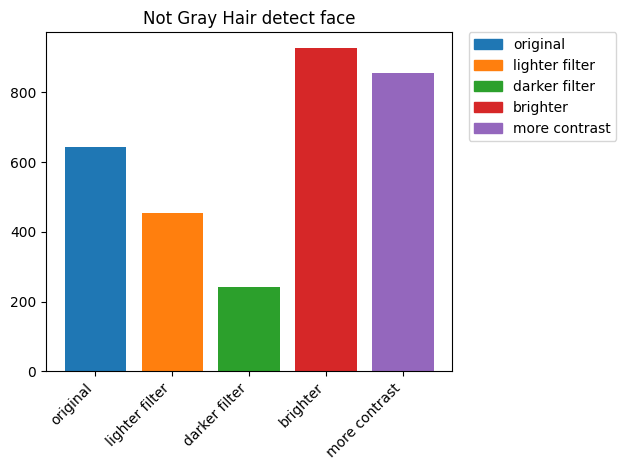

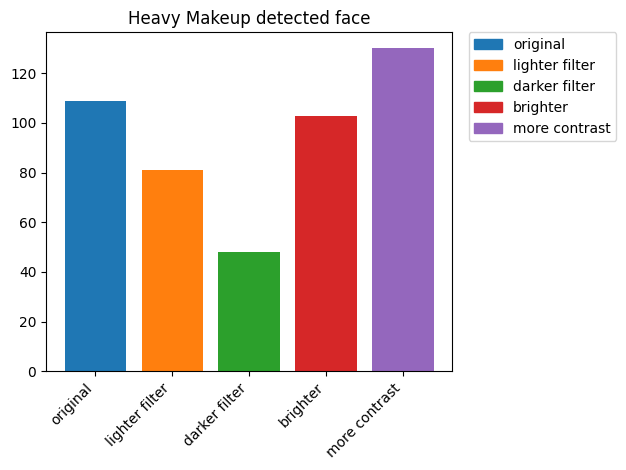

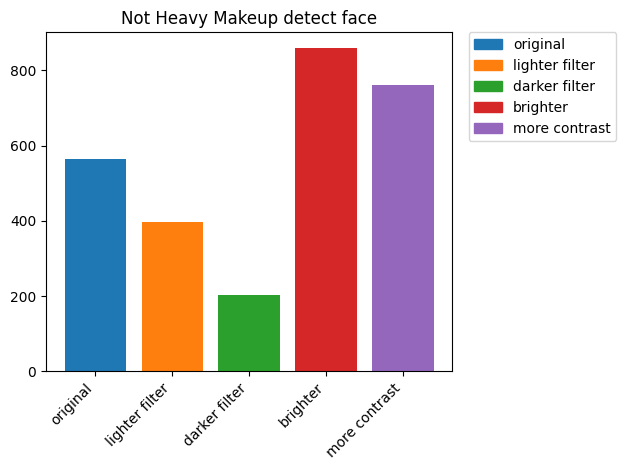

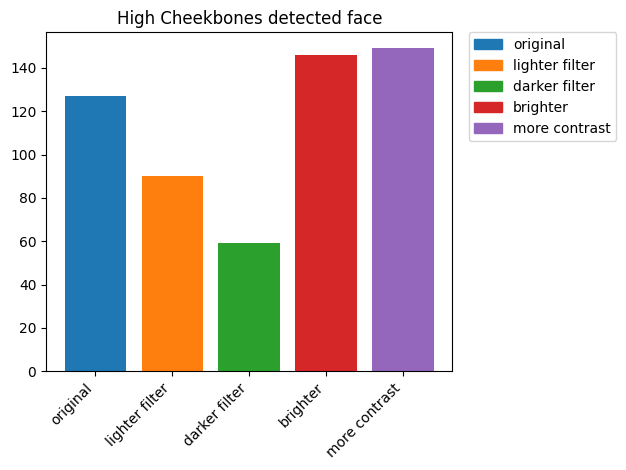

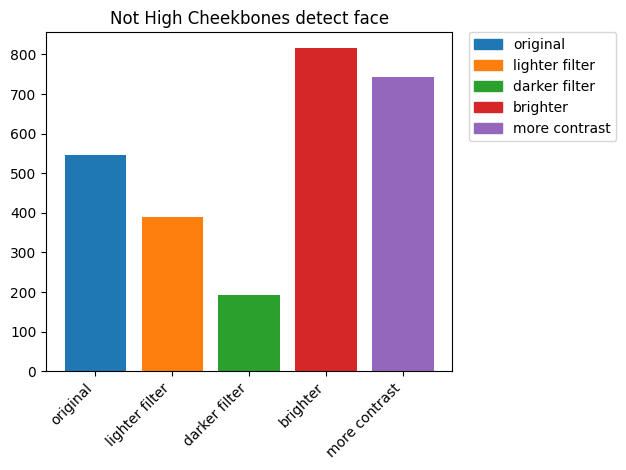

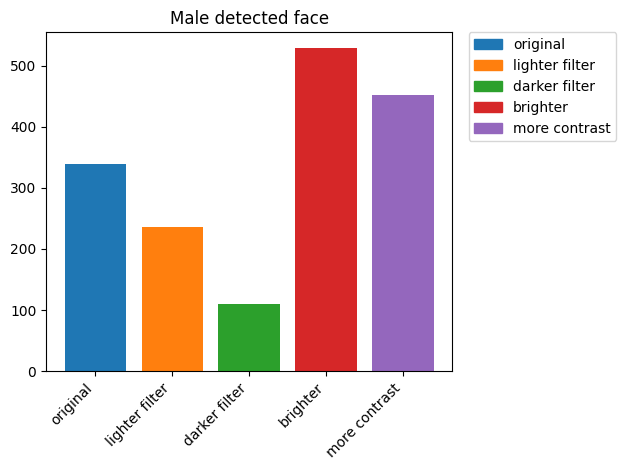

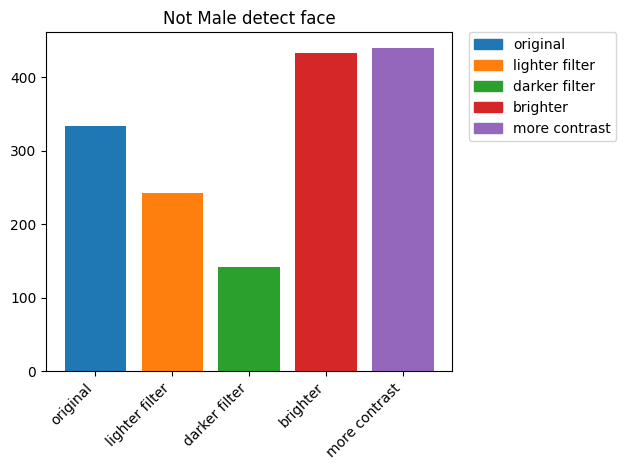

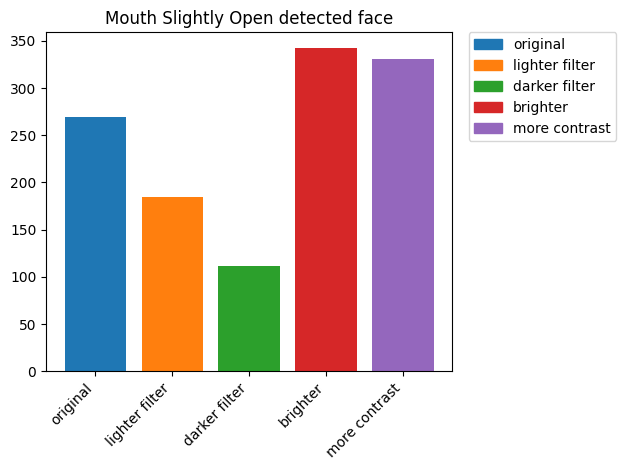

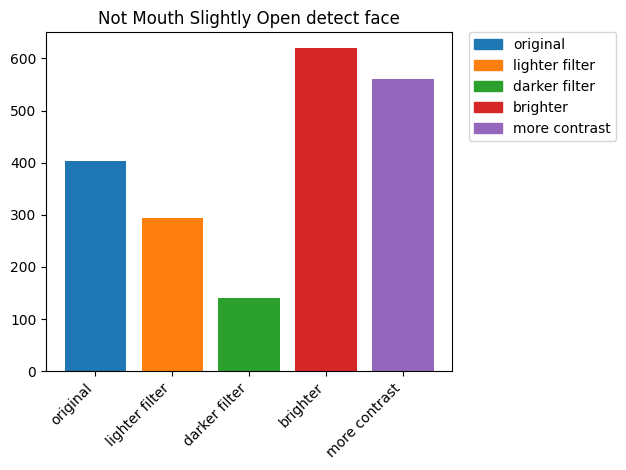

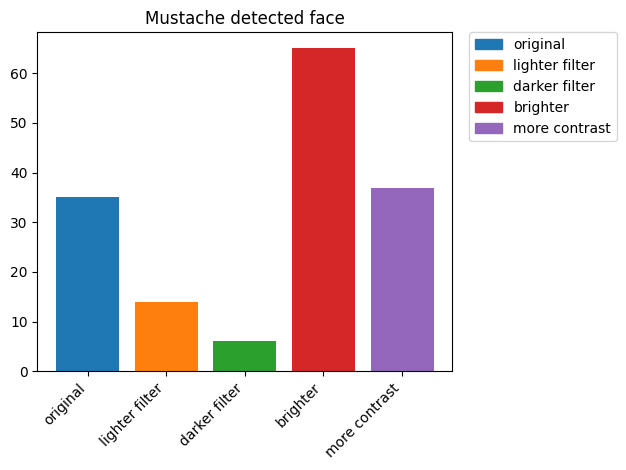

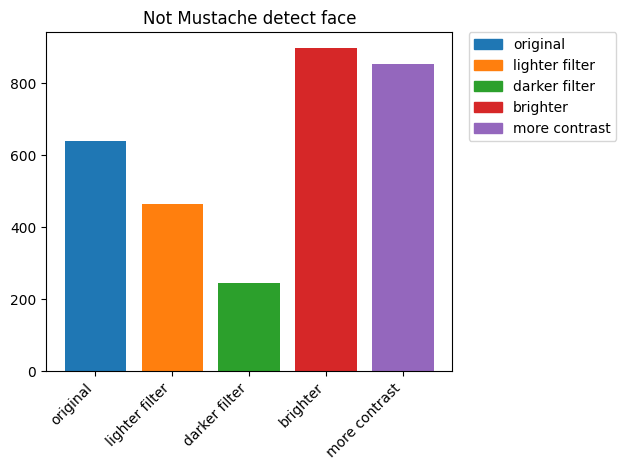

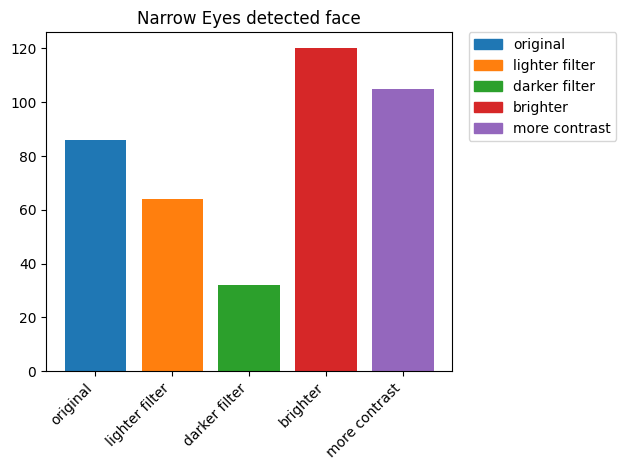

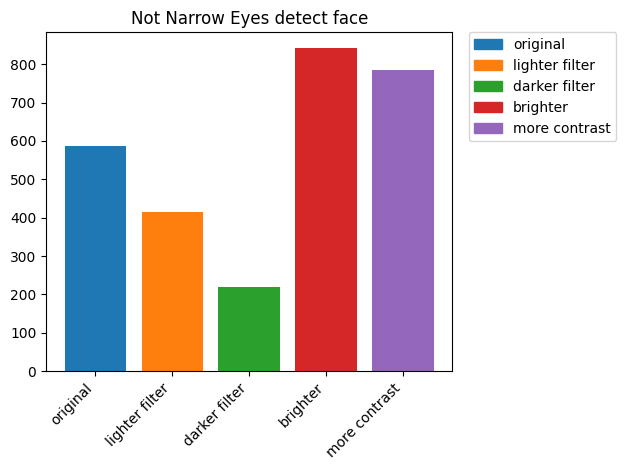

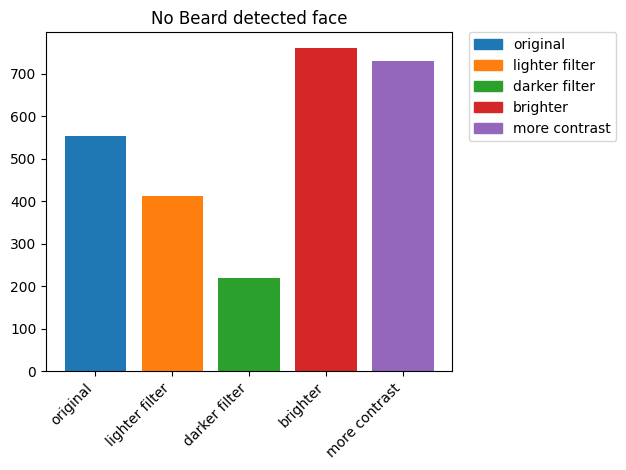

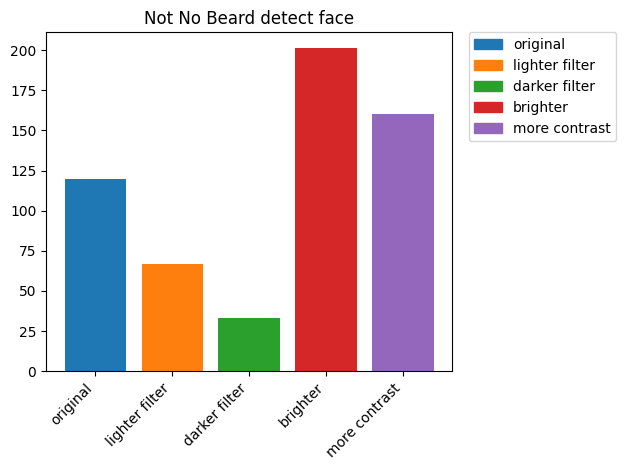

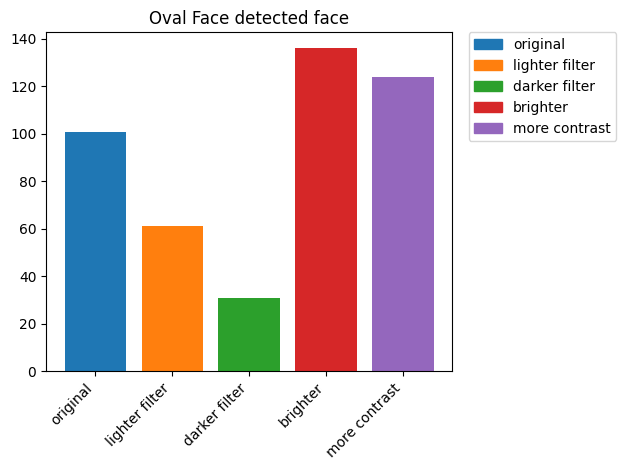

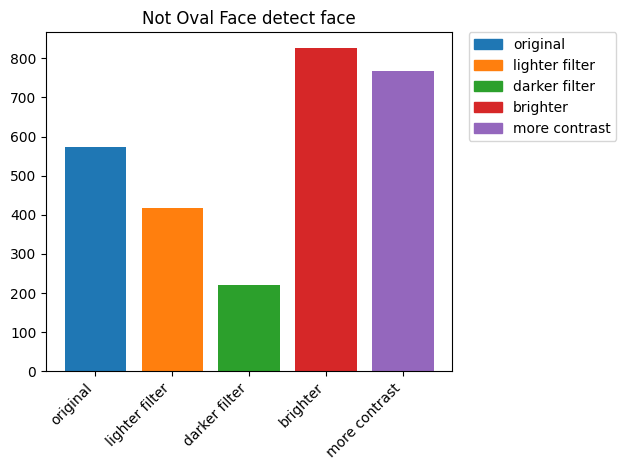

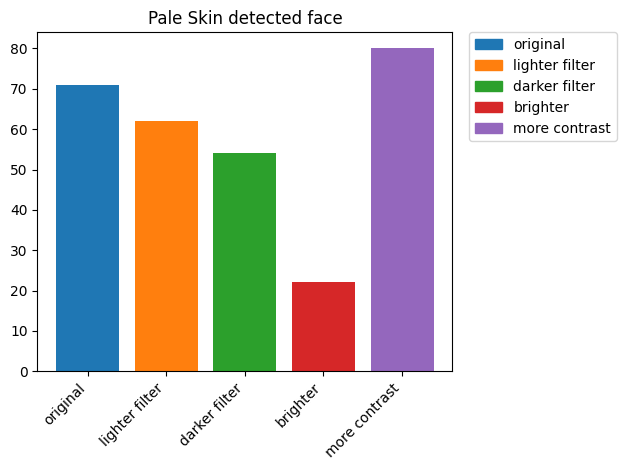

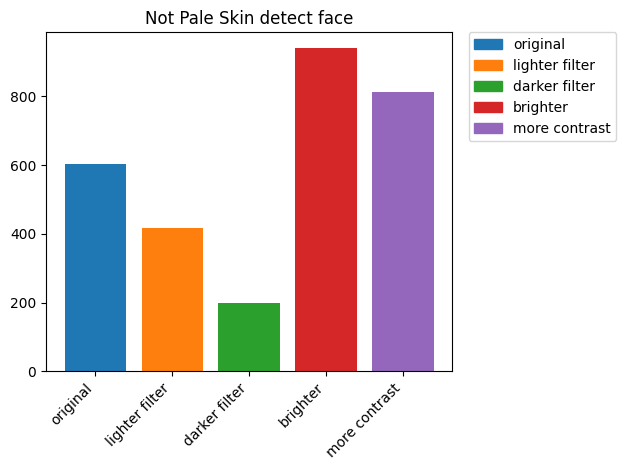

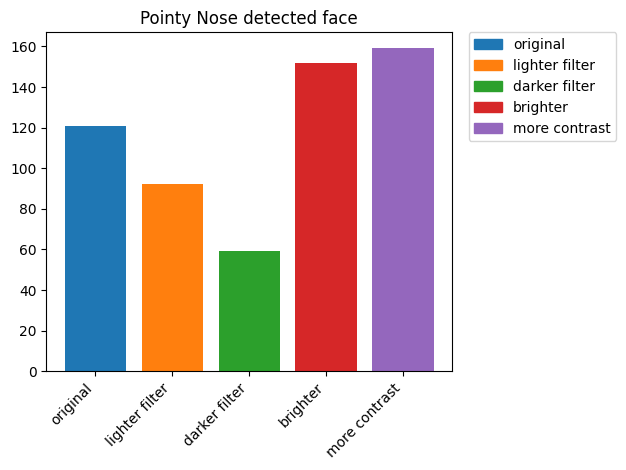

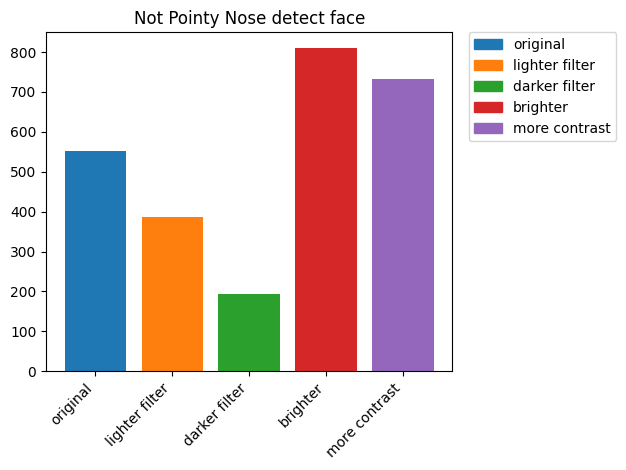

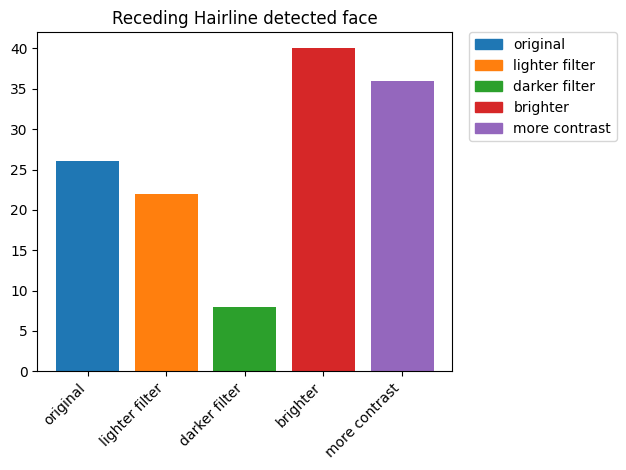

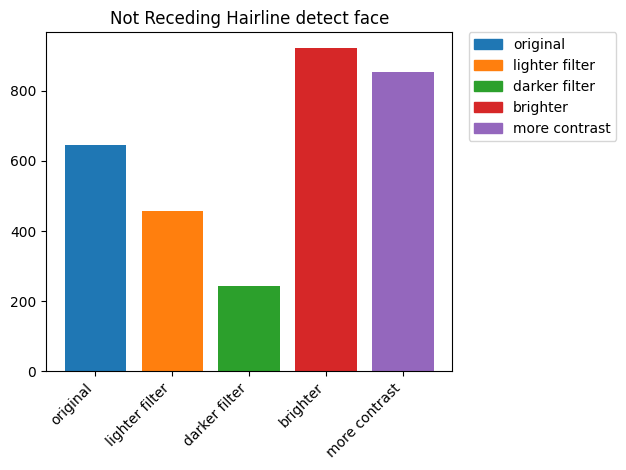

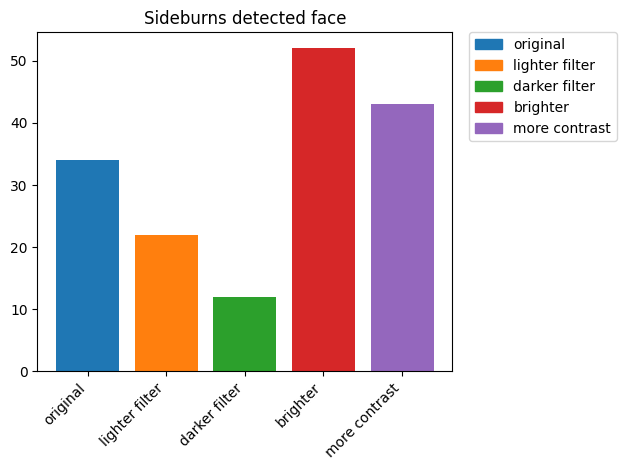

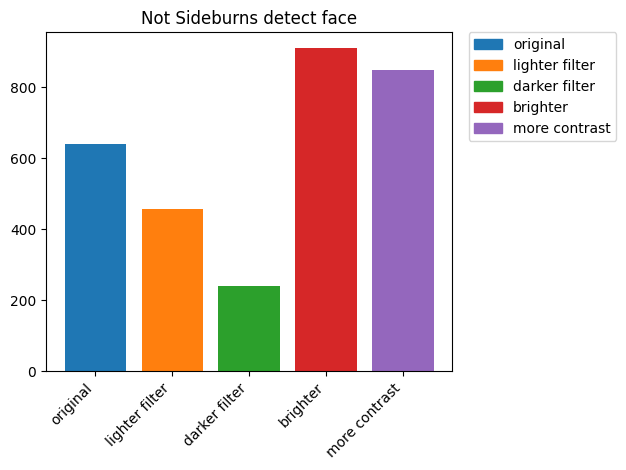

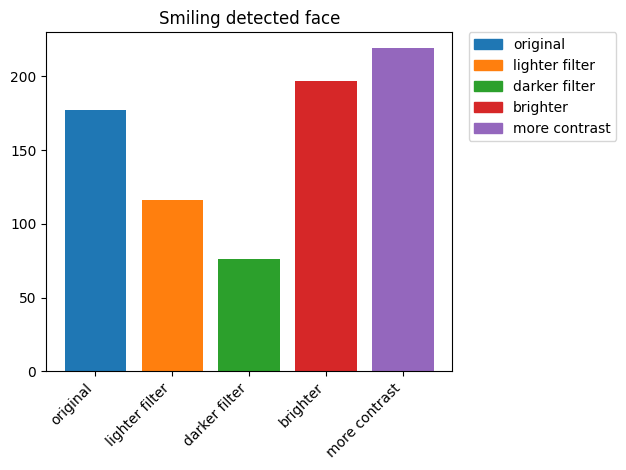

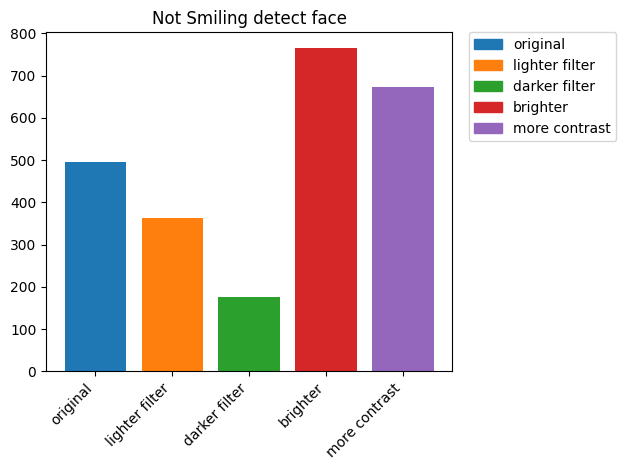

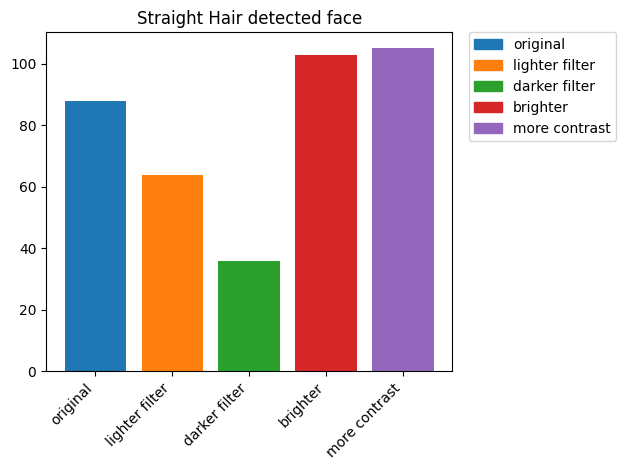

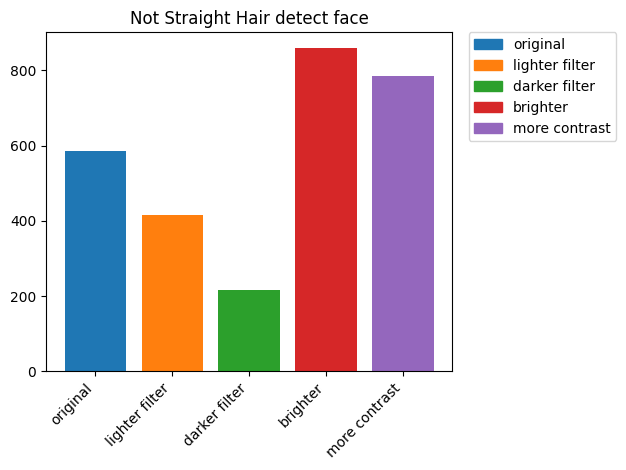

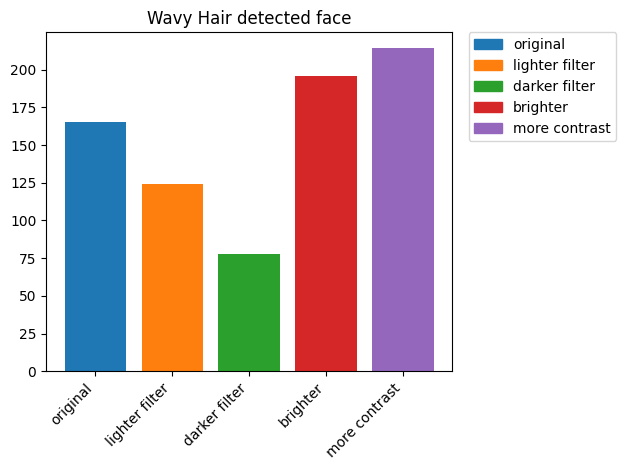

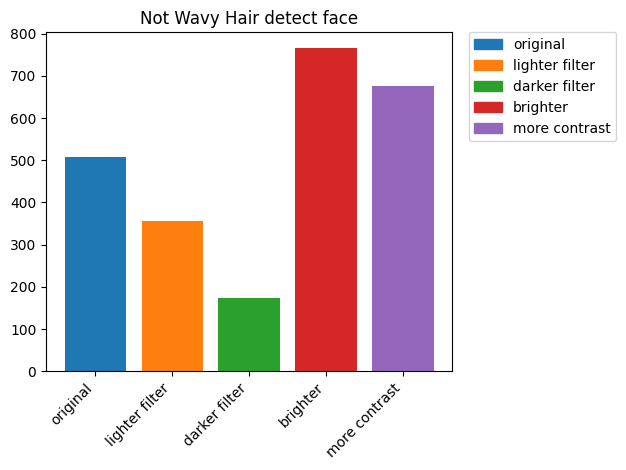

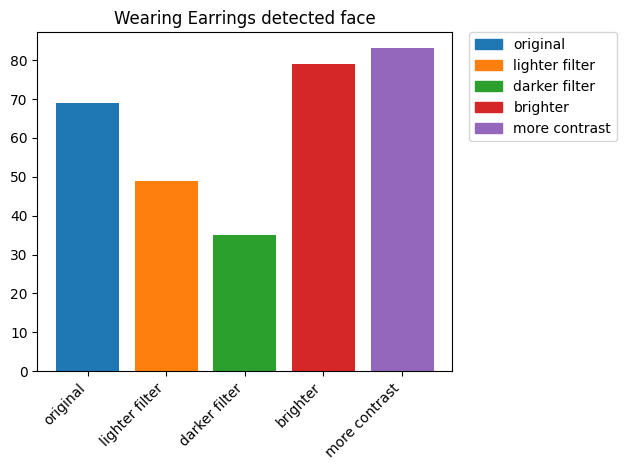

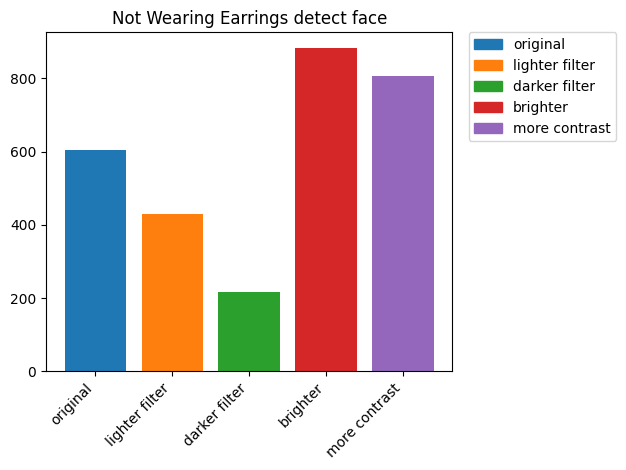

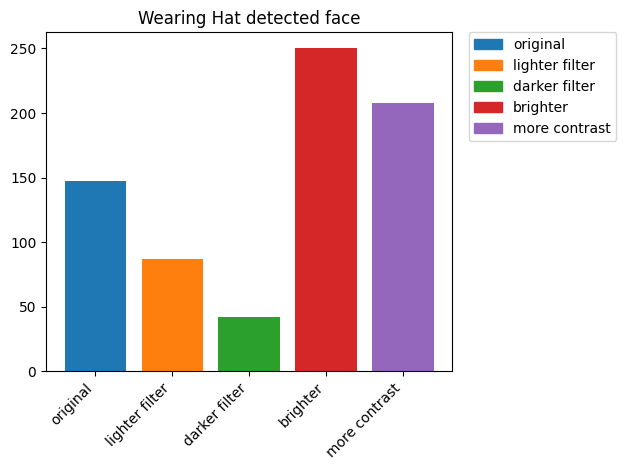

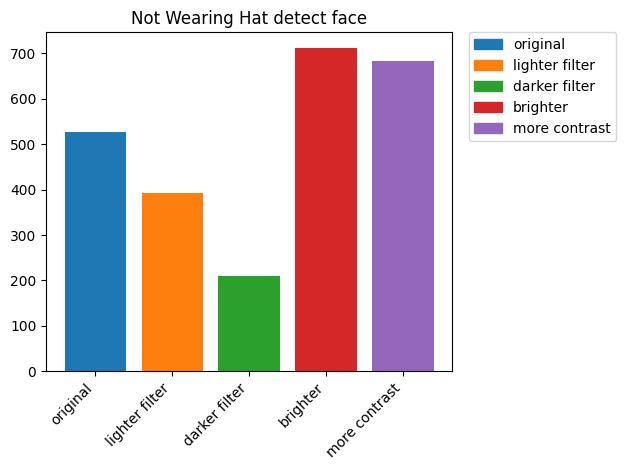

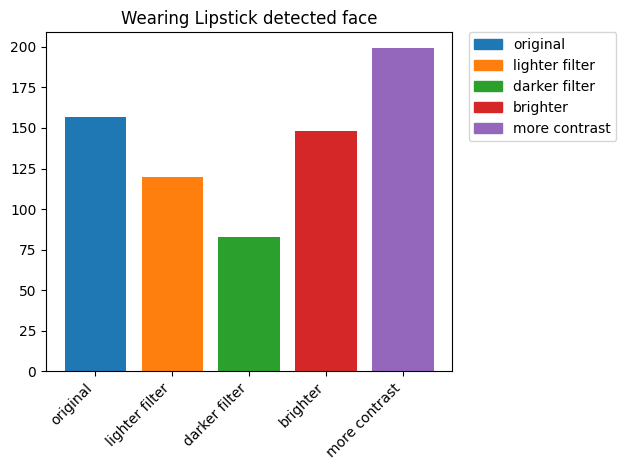

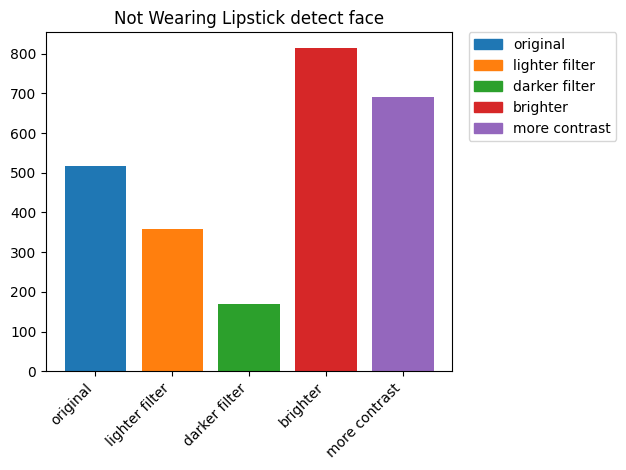

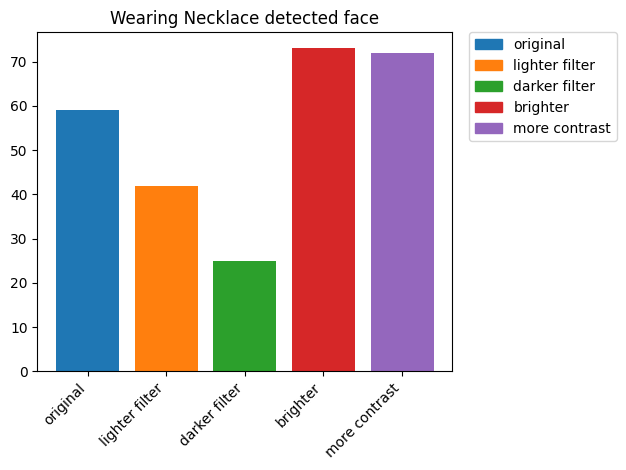

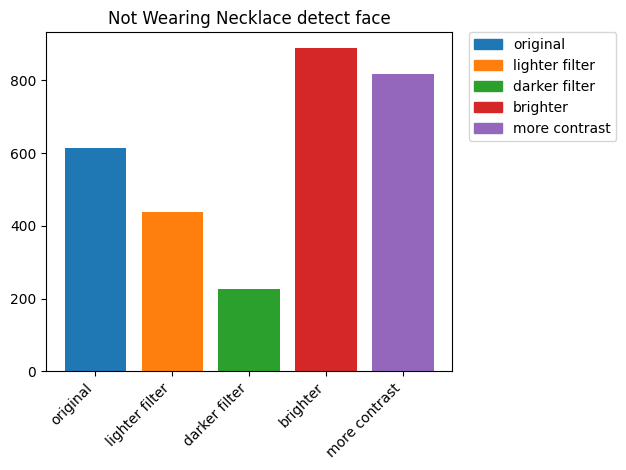

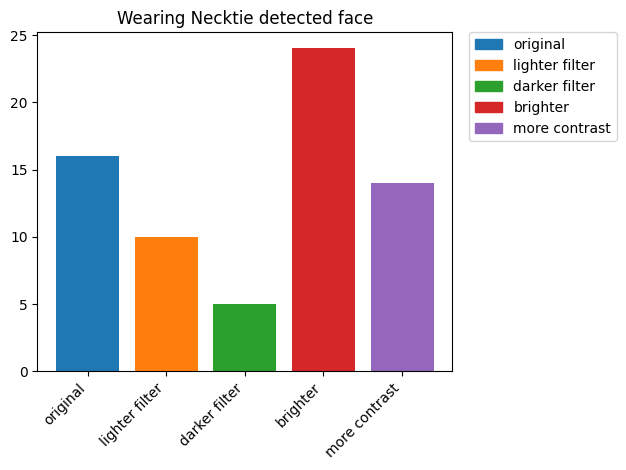

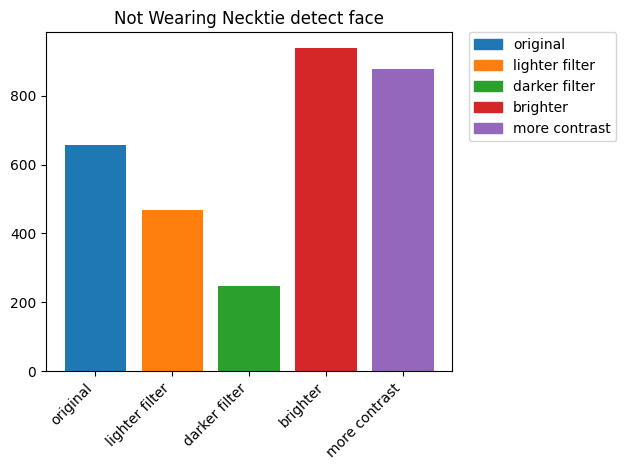

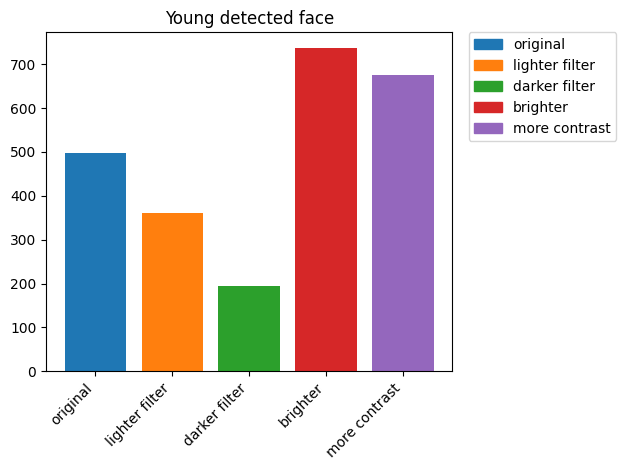

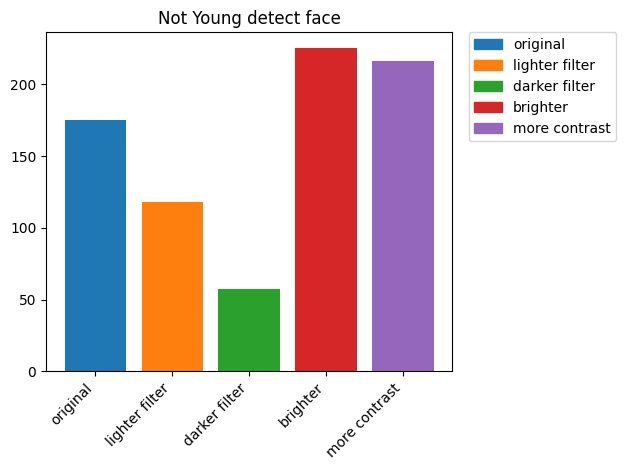

In [173]:
for feature in binary_features:
    if feature == 'Rosy_Cheeks':
        continue
    found_ratios = []
    nof_ratios = []
    not_found_ratios = []
    for aug in augs:
        filtered_new_df = some_rec_df.query(f'{aug} == 1')
        feature_ratio = filtered_new_df[feature].value_counts() 
        found_ratios.append(feature_ratio[1])
        nof_ratios.append(feature_ratio[-1])
        filtered_new_df = some_rec_df.query(f'{aug} == -1')
        feature_ratio = filtered_new_df[feature].value_counts() 
        not_found_ratios.append(feature_ratio[1])
    fig, ax = plt.subplots()
    ax.bar(t_index, found_ratios,color = mcolors.TABLEAU_COLORS)
    ax.set_title(' '.join(feature.split('_')) + ' detected face')   
    ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
    color_names = list(mcolors.TABLEAU_COLORS.keys())[:5]
    patches = [mpatches.Patch(color = color_names[i], label = l)for i,l in enumerate(t_index)]
    ax.legend(handles = patches,bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../data/found_some/' + feature + '_detected.png')
    fig, ax = plt.subplots()
    ax.bar(t_index, nof_ratios,color = mcolors.TABLEAU_COLORS)
    ax.set_title('Not ' +' '.join(feature.split('_')) +' detect face')   
    ax.set_xticklabels(t_index, rotation=45, horizontalalignment='right')
    color_names = list(mcolors.TABLEAU_COLORS.keys())[:5]
    patches = [mpatches.Patch(color = color_names[i], label = l)for i,l in enumerate(t_index)]
    ax.legend(handles = patches,bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)
    plt.tight_layout()
    plt.savefig('../data/found_some/not_' + feature + '_detected.png')

In [138]:
augs

['Recognized',
 'Recognized_lighter_skin',
 'Recognized_darker_skin',
 'Recognized_brighter',
 'Recognized_contrast']

In [143]:
some_rec_df.query('Recognized_brighter == 1')

5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
image_id                                                                     
087832.jpg              -1.0             -1.0         1.0             -1.0   
116952.jpg              -1.0             -1.0        -1.0             -1.0   
051598.jpg              -1.0             -1.0        -1.0             -1.0   
191138.jpg              -1.0             -1.0         1.0             -1.0   
033270.jpg              -1.0             -1.0        -1.0             -1.0   
...                      ...              ...         ...              ...   
201042.jpg              -1.0             -1.0        -1.0              1.0   
201104.jpg              -1.0             -1.0        -1.0             -1.0   
201791.jpg              -1.0             -1.0        -1.0             -1.0   
201900.jpg              -1.0             -1.0        -1.0             -1.0   
202155.jpg              -1.0             -1.0        -1.0             -1.0   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
image_id                                                             ...   
087832.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
116952.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
051598.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
191138.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
033270.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
...          ...    ...       ...       ...         ...         ...  ...   
201042.jpg  -1.0   -1.0       1.0       1.0        -1.0        -1.0  ...   
201104.jpg  -1.0   -1.0       1.0       1.0        -1.0        -1.0  ...   
201791.jpg  -1.0    1.0      -1.0      -1.0         1.0        -1.0  ...   
201900.jpg  -1.0   -1.0      -1.0      -1.0        -1.0        -1.0  ...   
202155.jpg  -1.0    1.0      -1.0      -1.0         1.0        -1.0  ...   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
image_id                                                                       
087832.jpg         -1.0              -1.0               1.0             -1.0   
116952.jpg          1.0              -1.0              -1.0             -1.0   
051598.jpg          1.0              -1.0              -1.0             -1.0   
191138.jpg         -1.0               1.0              -1.0             -1.0   
033270.jpg         -1.0               1.0              -1.0             -1.0   
...                 ...               ...               ...              ...   
201042.jpg          1.0              -1.0              -1.0             -1.0   
201104.jpg         -1.0              -1.0              -1.0             -1.0   
201791.jpg         -1.0               1.0              -1.0             -1.0   
201900.jpg         -1.0              -1.0              -1.0             -1.0   
202155.jpg         -1.0               1.0              -1.0             -1.0   

            Young  Recognized  Recognized_lighter_skin  \
image_id                                                 
087832.jpg    1.0         1.0                      1.0   
116952.jpg    1.0         1.0                     -1.0   
051598.jpg    1.0         1.0                      1.0   
191138.jpg    1.0         1.0                      1.0   
033270.jpg    1.0         1.0                     -1.0   
...           ...         ...                      ...   
201042.jpg    1.0        -1.0                     -1.0   
201104.jpg    1.0        -1.0                     -1.0   
201791.jpg    1.0        -1.0                     -1.0   
201900.jpg    1.0        -1.0                     -1.0   
202155.jpg    1.0        -1.0                     -1.0   

            Recognized_darker_skin  Recognized_brighter  Recognized_contrast  
image_id                                                                      
087832.jpg                    -1.0                  1.

In [148]:
new_sample_df.query('Recognized_darker_skin == 1')

5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
image_id                                                                     
066574.jpg                 1               -1          -1                1   
194491.jpg                -1                1           1               -1   
151301.jpg                -1               -1          -1                1   
089630.jpg                -1               -1           1               -1   
184562.jpg                -1                1          -1                1   
...                      ...              ...         ...              ...   
185178.jpg                -1               -1          -1               -1   
187576.jpg                -1               -1          -1               -1   
188957.jpg                -1               -1          -1               -1   
197244.jpg                -1               -1          -1               -1   
199252.jpg                -1               -1          -1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
image_id                                                             ...   
066574.jpg    -1     -1        -1        -1          -1          -1  ...   
194491.jpg    -1     -1        -1        -1          -1          -1  ...   
151301.jpg    -1     -1         1         1           1          -1  ...   
089630.jpg    -1     -1        -1        -1          -1           1  ...   
184562.jpg    -1     -1         1         1           1          -1  ...   
...          ...    ...       ...       ...         ...         ...  ...   
185178.jpg    -1     -1        -1        -1          -1          -1  ...   
187576.jpg    -1     -1        -1        -1           1          -1  ...   
188957.jpg    -1     -1        -1        -1           1          -1  ...   
197244.jpg    -1     -1        -1        -1          -1          -1  ...   
199252.jpg    -1     -1        -1        -1          -1          -1  ...   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
image_id                                                                       
066574.jpg            1                -1                -1               -1   
194491.jpg           -1                 1                 1               -1   
151301.jpg           -1                -1                -1               -1   
089630.jpg           -1                 1                -1               -1   
184562.jpg           -1                -1                -1                1   
...                 ...               ...               ...              ...   
185178.jpg            1                -1                -1               -1   
187576.jpg           -1                -1                -1               -1   
188957.jpg           -1                -1                -1               -1   
197244.jpg           -1                -1                -1               -1   
199252.jpg           -1                -1                -1               -1   

            Young  Recognized  Recognized_lighter_skin  \
image_id                                                 
066574.jpg      1           1                        1   
194491.jpg      1           1                        1   
151301.jpg      1           1                        1   
089630.jpg     -1           1                        1   
184562.jpg      1           1                        1   
...           ...         ...                      ...   
185178.jpg      1          -1                        1   
187576.jpg      1          -1                        1   
188957.jpg      1          -1                       -1   
197244.jpg      1          -1                        1   
199252.jpg      1          -1                        1   

            Recognized_darker_skin  Recognized_brighter  Recognized_contrast  
image_id                                                                      
066574.jpg                       1                    

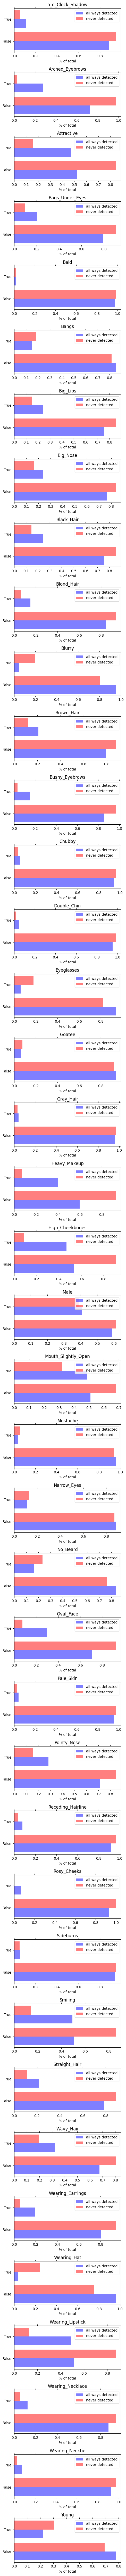

In [155]:
bar_width = 0.4
bar_offset = bar_width/2

fig, axs = plt.subplots(nrows=len(all_rec_df.columns)-5, figsize=(5, 100))

for i, col in enumerate(all_rec_df.columns[:-5]):
    # Calculate the position for the bars
    positions = np.arange(len(all_rec_df[col].value_counts()))

    # Plot the found count bars
    axs[i].barh(positions - bar_offset, all_rec_df[col].value_counts()/len(all_rec_df), height=bar_width, color='blue',
                alpha=0.5, label='all ways detected')

    # Plot the not found count bars
    axs[i].barh(positions + bar_offset, non_rec_df[col].value_counts()/len(non_rec_df), height=bar_width, color='red',
                alpha=0.5, label='never detected')

    axs[i].set_yticks(positions)
    # axs[i].set_yticklabels(all_rec_df[col].value_counts().index)
    try:
        axs[i].set_yticklabels(['False', 'True'])
    except:
        print('error')
    axs[i].tick_params(top=True)
    
    axs[i].set_xlabel('% of total')
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()

In [156]:
all_rec_df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young', 'Recognized',
       'Recognized_lighter_skin', 'Recognized_darker_skin',
       'Recognized_brighter', 'Recognized_contrast'],
      dtype='object')

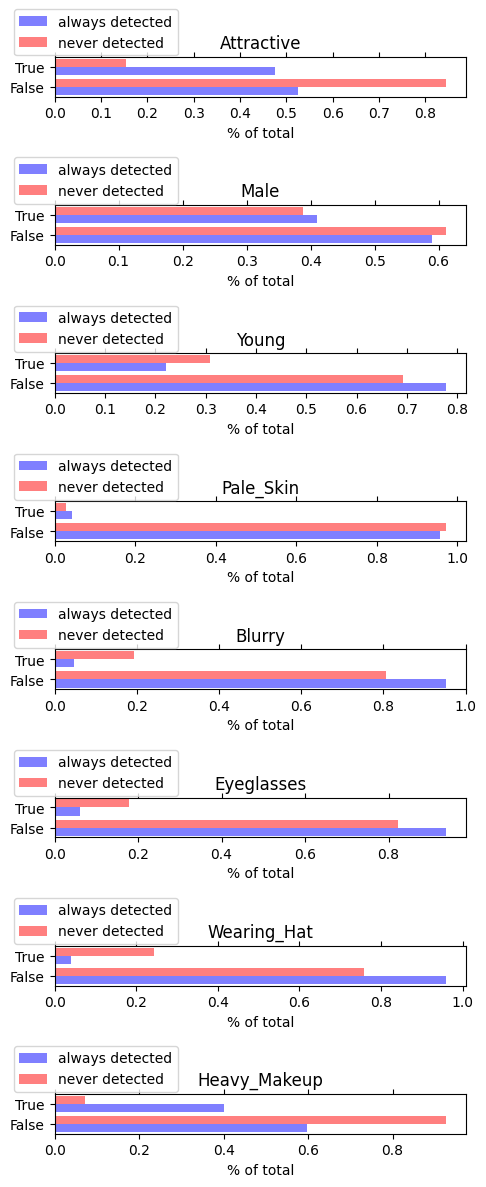

In [171]:
cols_to_show = [ 'Attractive','Male', 'Young','Pale_Skin', 'Blurry','Eyeglasses','Wearing_Hat','Heavy_Makeup']
bar_width = 0.4
bar_offset = bar_width/2

fig, axs = plt.subplots(nrows=len(cols_to_show), figsize=(5, 12))

for i, col in enumerate(cols_to_show):
    # Calculate the position for the bars
    positions = np.arange(len(all_rec_df[col].value_counts()))

    # Plot the found count bars
    axs[i].barh(positions - bar_offset, all_rec_df[col].value_counts()/len(all_rec_df), height=bar_width, color='blue',
                alpha=0.5, label='always detected')

    # Plot the not found count bars
    axs[i].barh(positions + bar_offset, non_rec_df[col].value_counts()/len(non_rec_df), height=bar_width, color='red',
                alpha=0.5, label='never detected')

    axs[i].set_yticks(positions)
    # axs[i].set_yticklabels(all_rec_df[col].value_counts().index)
    try:
        axs[i].set_yticklabels(['False', 'True'])
    except:
        print('error')
    axs[i].tick_params(top=True)
    
    axs[i].set_xlabel('% of total')
    axs[i].set_title(col)
    axs[i].legend(bbox_to_anchor=(0.3, 1.04), loc="lower right", borderaxespad=0)

plt.tight_layout()
plt.show()